In [241]:
#Import all relevant libraries
import numpy as np
import pandas as pd
# install the libaries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [242]:
# Load original datasets
df_coffee = pd.read_csv('riyadh_coffee_shops.csv')
df_rest = pd.read_csv('riyadh_restaurants.csv')
df_venue = pd.read_csv('riyadh_venues.csv')

# Load new datasets (places near events)
df_events_coffee = pd.read_csv('riyadh_events_coffee_shops.csv')
df_events_rest = pd.read_csv('riyadh_events_restaurants.csv')
df_events_venue = pd.read_csv('riyadh_events_venues.csv')

# Function to merge and remove duplicates based on FSQ_ID
def merge_and_clean(original_df, new_df):
    combined_df = pd.concat([original_df, new_df])
    return combined_df.drop_duplicates(subset=['FSQ_ID']).reset_index(drop=True)

# Merge and keep results in the original variable names
df_coffee = merge_and_clean(df_coffee, df_events_coffee)
df_rest = merge_and_clean(df_rest, df_events_rest)
df_venue = merge_and_clean(df_venue, df_events_venue)

### Viewing the dataframe


In [243]:
df_coffee.head(2)

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Menu,Social Media,Description,Photo URL,User Tip,Timezone
0,Al Sahafah,6006c78ff1b7397aa42ade5d,Rex Coffee,Prince Naser Bin Saud Bin Farhan Al Saud St (P...,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.810994,46.646022,Coffee Shop,9.6,2440,34221,407,0.999979,False,NaN,056 566 6167,1.0,"Mon-Thu 0:00-1:00, 6:00-24:00; Fri 0:00-24:00;...",Day 1: 0800 - 1100; Day 1: 1800 - +0000; Day 2...,NaN,"{'instagram': 'rexcoffee_sa', 'twitter': 'rexc...",NaN,NaN,NaN,Asia/Riyadh
1,Al Sahafah,5ff4e7472c5313266e868d95,Kicksters (ﺯﺮﺘﺴﻜﻴﻛ),"Wadi Hajr St (ﺽﺎﻳﺮﻟﺍ ,(ﺮﺠﻫ ﻱﺩﺍﻭ ﻉﺭﺎﺷ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.813103,46.607410,Coffee Shop,9.6,2144,57561,301,0.999956,False,NaN,055 436 6781,1.0,Mon-Wed 6:00-23:30; Thu 6:00-24:00; Fri 12:30-...,Day 1: 1800 - 2300; Day 2: 1800 - 2300; Day 3:...,NaN,{'instagram': 'kicksters.sa'},NaN,NaN,NaN,Asia/Riyadh


In [244]:
df_rest.head()

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Menu,Social Media,Description,Photo URL,User Tip,Timezone
0,Al Sahafah,63fd69228323d16439e9bc55,Shml (ﻞﻤﺷ),"Alshaikh Abdullah Bin Jabran St, 13531 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.829259,46.598412,Café,9.5,890,25697,87,0.999669,False,NaN,NaN,1.0,Mon-Thu 6:00-24:00; Fri 0:00-24:00; Sat 0:00-1...,Day 1: 1800 - +0000; Day 2: 1900 - +0000; Day ...,NaN,{'instagram': 'shml_ksa'},NaN,NaN,NaN,Asia/Riyadh
1,Al Sahafah,5946e659c21cb154611d5590,The60Pasta,"Wadi Alhayat St, ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.788459,46.640730,Food Truck,9.4,739,6094,99,0.999573,False,NaN,056 824 7558,1.0,Open Daily 0:00-2:00,Day 1: 2100 - +0200; Day 2: 2100 - +0200; Day ...,NaN,{'instagram': 'the60pasta'},NaN,NaN,NaN,Asia/Riyadh
2,Al Sahafah,60ead184c7da7e768c97a5fb,Sol Olas,"Olaya St, 13311 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.766328,46.648833,Breakfast Spot,9.1,1100,28186,141,0.999543,False,https://www.menu-restaurant-ksa.com/2023/03/so...,NaN,1.0,Open Daily 0:00-24:00,Day 1: 2000 - +0200; Day 2: 2000 - +0200; Day ...,https://www.menu-restaurant-ksa.com/2023/03/so...,{'instagram': 'sololas.sa'},NaN,NaN,NaN,Asia/Riyadh
3,Al Sahafah,646cb3f4a4c5a722f8365f9f,PrimeCut,"Abi Bakir Alsiddiq Rd, 13317 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.804367,46.673874,Burger Joint,9.2,593,4881,74,0.999413,False,http://qrco.de/be09ff,NaN,1.0,Mon-Thu 0:00-2:30; Fri-Sun 0:00-3:30,Day 1: 2000 - +0200; Day 2: 2100 - +0200; Day ...,NaN,{'instagram': 'primecut_sa'},NaN,NaN,NaN,Asia/Riyadh
4,Al Sahafah,628291187a99a94b9a46119e,Sign (ﻦﻳﺎﺳ),"Alyasmeen (Anas Bin Malik), ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.821548,46.650312,Burger Joint,8.4,1246,7963,113,0.999319,False,https://www.menu-restaurant-ksa.com/2023/09/Si...,NaN,1.0,Open Daily 0:00-4:00,Day 1: 2100 - +0300; Day 2: 2100 - +0300; Day ...,https://www.menu-restaurant-ksa.com/2023/09/Si...,{},NaN,NaN,NaN,Asia/Riyadh


In [245]:
df_venue.head()

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Menu,Social Media,Description,Photo URL,User Tip,Timezone
0,Al Sahafah,54ef5b52498e08a96c0bd30f,Al Makan Mall (ﻝﻮﻣ ﻥﺎﻜﻤﻟﺍ),Prince Muhammad Bin Abdulaziz Rd (Prince Muham...,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.791533,46.611446,Shopping Mall,8.4,1491,1353,118,0.999109,False,http://www.wabelalarabia.com,NaN,NaN,NaN,Day 1: 1600 - +0000; Day 2: 1600 - 2300; Day 3...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
1,Al Sahafah,5c86780fd176e90025d42861,Vox Cinemas (ﺎﻤﻨﻴﺳ ﺲﻛﻮﭬ),"Abi Bakr As Siddiq Rd (Anas Ibn Malik Rd.), ﻦﻴ...",ﻦﻴﻤﺳﺎﻴﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.817421,46.664813,Movie Theater,9.3,2880,18643,285,0.999056,False,https://ksa.voxcinemas.com,9200 06883,NaN,Open Daily 0:00-24:00,Day 1: 1900 - +0200; Day 2: 1900 - +0200; Day ...,NaN,"{'instagram': 'vox_cinemas_ksa', 'twitter': 'v...",NaN,NaN,NaN,Asia/Riyadh
2,Al Sahafah,5f11856ddc9b9934e1fd8961,AMC Cinemas (ﺎﻤﻨﻴﺳ ﻲﺳ ﻡﺍ ﻱﺍ),"13521 ﺽﺎﻳﺮﻟﺍ ,ﻝﻮﻣ ﻥﺎﻜﻤﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.790662,46.612272,Movie Theater,9.1,685,14131,79,0.998807,False,http://www.amccinemas.com,NaN,NaN,NaN,NaN,NaN,"{'facebook_id': '287560452086', 'instagram': '...",NaN,NaN,NaN,Asia/Riyadh
3,Al Sahafah,5fe5cde55c0c0813b970696c,Al Rabia Mall,13326 ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.822796,46.651317,Miscellaneous Store,6.9,8,3,1,0.990195,False,NaN,NaN,NaN,NaN,Day 1: 1600 - +0000; Day 2: 1500 - 2300; Day 3...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
4,Al Sahafah,62b5a2c7258b1320fe2e573c,mallow (ﻮﻠﻣ),"13326 ﺽﺎﻳﺮﻟﺍ ,(ﻖﻳﺪﺼﻟﺍ ﺮﻜﺑ ﻮﺑﺍ) ﻦﻴﻤﺳﺎﻴﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.828652,46.660330,Breakfast Spot,8.1,152,1045,51,0.967280,True,https://linktr.ee/mallowksa,059 555 0650,1.0,Open Daily 5:00-24:00,Day 1: 0700 - 1500; Day 2: 0900 - 1400; Day 3:...,https://mallow.yallaqrcodes.com,"{'instagram': 'mallowksa', 'twitter': 'mallowk...",Brunch & Cafe,NaN,NaN,Asia/Riyadh


## 1. Data Profiling:


### Coffee Shops

In [246]:
df_coffee.describe()

,Latitude,Longitude,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Price Tier,Photo URL,User Tip
count,1258.000000,1258.000000,988.000000,1258.000000,1258.000000,1258.000000,1258.000000,1230.000000,0.0,0.0
mean,24.698480,46.628385,8.470445,283.116057,3191.491256,43.936407,0.919694,1.100813,NaN,NaN
std,0.318552,0.577827,0.692701,769.423561,8470.154399,122.344652,0.185384,0.332042,NaN,NaN
min,21.338425,40.270237,5.300000,0.000000,-4.000000,0.000000,0.015290,1.000000,NaN,NaN
25%,24.640674,46.606948,8.100000,9.000000,12.250000,1.000000,0.954483,1.000000,NaN,NaN
50%,24.737037,46.675760,8.600000,34.000000,210.500000,6.000000,0.986601,1.000000,NaN,NaN
75%,24.803896,46.751570,9.000000,200.750000,1812.000000,32.000000,0.995321,1.000000,NaN,NaN
max,25.016646,46.942176,9.600000,13275.000000,80359.000000,2269.000000,0.999996,3.000000,NaN,NaN


In [247]:
df_coffee.describe(include='object')

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Category,Website,Telephone,Hours,Popular Hours,Menu,Social Media,Description,Timezone
count,1258,1258,1258,1205,1161,1196,1258,1257,267,336,464,797,54,1258,38,1258
unique,78,1258,1080,1019,6,4,1,38,196,288,245,782,42,356,29,1
top,Umm Al Hammam (West),646bb90b1713d63fad0c3423,ﻲﺑﺮﻐﻣ ﺝﺍﺰﻣ,ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,Coffee Shop,http://www.starbucks.com,059 000 3100,Open Daily 0:00-24:00,Day 1: 1900 - +0000; Day 2: 1900 - +0000; Day ...,https://www.menu-restaurant-ksa.com/2020/10/ky...,{},.ﻢﻟﺎﻌﻟﺍ ﻝﻮﺣ ﻉﻭﺮﻔﻟﺍ ﺕﺎﺌﻣ ﻚﻠﺘﻤﺗ ﺔﺋﺰﺠﺘﻟﺍ ﻊﻴﺑﻭ ﺓﻮﻬ...,Asia/Riyadh
freq,87,1,13,65,1149,1161,1258,741,15,9,84,4,4,850,7,1258


In [248]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Neighborhood      1258 non-null   object 
 1   FSQ_ID            1258 non-null   object 
 2   Name              1258 non-null   object 
 3   Address           1205 non-null   object 
 4   Locality          1161 non-null   object 
 5   Region            1196 non-null   object 
 6   Country           1258 non-null   object 
 7   Latitude          1258 non-null   float64
 8   Longitude         1258 non-null   float64
 9   Category          1257 non-null   object 
 10  Rating            988 non-null    float64
 11  Total Ratings     1258 non-null   int64  
 12  Total Photos      1258 non-null   int64  
 13  Total Tips        1258 non-null   int64  
 14  Popularity Score  1258 non-null   float64
 15  Verified          1258 non-null   bool   
 16  Website           267 non-null    object 


In [249]:
df_coffee.dtypes

Neighborhood         object
FSQ_ID               object
Name                 object
Address              object
Locality             object
Region               object
Country              object
Latitude            float64
Longitude           float64
Category             object
Rating              float64
Total Ratings         int64
Total Photos          int64
Total Tips            int64
Popularity Score    float64
Verified               bool
Website              object
Telephone            object
Price Tier          float64
Hours                object
Popular Hours        object
Menu                 object
Social Media         object
Description          object
Photo URL           float64
User Tip            float64
Timezone             object
dtype: object

### Restaurants

In [250]:
df_rest.describe()

,Latitude,Longitude,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Price Tier,Photo URL,User Tip
count,1408.000000,1408.000000,1221.00000,1408.000000,1408.000000,1408.000000,1408.000000,1226.000000,0.0,0.0
mean,24.693243,46.629435,8.35086,268.052557,1222.151989,45.742898,0.930719,1.272431,NaN,NaN
std,0.304711,0.549082,0.65121,826.194055,4115.981436,154.672791,0.179335,0.542863,NaN,NaN
min,21.338425,40.261110,5.50000,0.000000,-4.000000,0.000000,0.004265,1.000000,NaN,NaN
25%,24.618046,46.607896,7.90000,12.000000,13.000000,1.000000,0.977719,1.000000,NaN,NaN
50%,24.734556,46.673030,8.40000,49.000000,81.000000,7.000000,0.990683,1.000000,NaN,NaN
75%,24.799632,46.749778,8.80000,195.250000,505.000000,25.000000,0.995503,1.000000,NaN,NaN
max,25.021946,46.941926,9.60000,13275.000000,44735.000000,2269.000000,0.999783,4.000000,NaN,NaN


In [251]:
df_rest.describe(include='object')

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Category,Website,Telephone,Hours,Popular Hours,Menu,Social Media,Description,Timezone
count,1408,1408,1408,1279,1216,1278,1408,1408,478,550,478,941,126,1408,58,1408
unique,74,1408,1040,1057,14,7,1,73,221,416,213,933,60,279,44,1
top,Umm Al Hammam (West),61dd033d52dc4a469d579de2,Dunkin' Donuts (ﺲﺘﻧﻭﺩ ﻦﻜﻧﺍﺩ),ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,Café,http://www.mcdonaldsarabia.com/,011 465 1001,Open Daily 0:00-24:00,Day 1: 0500 - 1200; Day 2: 0500 - 1200; Day 3:...,https://www.menu-restaurant-ksa.com/2023/03/mc...,{},"Tastiest Pizza in Saudi since 1992, offering a...",Asia/Riyadh
freq,90,1,67,88,1190,1199,1408,198,50,43,61,3,20,1022,6,1408


In [252]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Neighborhood      1408 non-null   object 
 1   FSQ_ID            1408 non-null   object 
 2   Name              1408 non-null   object 
 3   Address           1279 non-null   object 
 4   Locality          1216 non-null   object 
 5   Region            1278 non-null   object 
 6   Country           1408 non-null   object 
 7   Latitude          1408 non-null   float64
 8   Longitude         1408 non-null   float64
 9   Category          1408 non-null   object 
 10  Rating            1221 non-null   float64
 11  Total Ratings     1408 non-null   int64  
 12  Total Photos      1408 non-null   int64  
 13  Total Tips        1408 non-null   int64  
 14  Popularity Score  1408 non-null   float64
 15  Verified          1408 non-null   bool   
 16  Website           478 non-null    object 


In [253]:
df_rest.dtypes

Neighborhood         object
FSQ_ID               object
Name                 object
Address              object
Locality             object
Region               object
Country              object
Latitude            float64
Longitude           float64
Category             object
Rating              float64
Total Ratings         int64
Total Photos          int64
Total Tips            int64
Popularity Score    float64
Verified               bool
Website              object
Telephone            object
Price Tier          float64
Hours                object
Popular Hours        object
Menu                 object
Social Media         object
Description          object
Photo URL           float64
User Tip            float64
Timezone             object
dtype: object

### Venues

In [254]:
df_venue.describe()

,Latitude,Longitude,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Price Tier,Photo URL,User Tip
count,335.000000,335.000000,103.000000,335.000000,335.000000,335.000000,305.000000,32.000000,0.0,0.0
mean,24.713190,46.700236,7.700000,312.071642,1164.701493,24.289552,0.717915,1.156250,NaN,NaN
std,0.070248,0.056446,1.206681,1377.873444,5086.893860,98.705588,0.305834,0.368902,NaN,NaN
min,24.532790,46.494782,5.300000,0.000000,0.000000,0.000000,0.000133,1.000000,NaN,NaN
25%,24.683170,46.664831,6.800000,0.000000,0.000000,0.000000,0.474954,1.000000,NaN,NaN
50%,24.723627,46.686545,7.800000,0.000000,0.000000,0.000000,0.875485,1.000000,NaN,NaN
75%,24.764322,46.731504,8.950000,14.500000,15.000000,2.000000,0.966884,1.000000,NaN,NaN
max,25.010736,46.888654,9.600000,14377.000000,53594.000000,1063.000000,0.999963,2.000000,NaN,NaN


In [255]:
df_venue.describe(include='object')

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Category,Website,Telephone,Hours,Popular Hours,Menu,Social Media,Description,Timezone
count,335,335,335,233,226,235,335,292,86,77,76,81,2,335,9,308
unique,33,335,304,182,3,4,1,72,57,62,48,80,2,36,8,1
top,Umm Al Hammam (East),5e2bb6c41215ef39635db180,Riy-panorama mall,ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,Shopping Mall,https://ksa.voxcinemas.com,9200 06883,Open Daily 0:00-24:00,Day 1: 2000 - +0200; Day 2: 2000 - +0200; Day ...,https://mallow.yallaqrcodes.com,{},Tres generaciones y más de 100 años de oficio ...,Asia/Riyadh
freq,49,1,4,39,224,192,335,75,6,4,8,2,1,293,2,308


In [256]:
df_venue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Neighborhood      335 non-null    object 
 1   FSQ_ID            335 non-null    object 
 2   Name              335 non-null    object 
 3   Address           233 non-null    object 
 4   Locality          226 non-null    object 
 5   Region            235 non-null    object 
 6   Country           335 non-null    object 
 7   Latitude          335 non-null    float64
 8   Longitude         335 non-null    float64
 9   Category          292 non-null    object 
 10  Rating            103 non-null    float64
 11  Total Ratings     335 non-null    int64  
 12  Total Photos      335 non-null    int64  
 13  Total Tips        335 non-null    int64  
 14  Popularity Score  305 non-null    float64
 15  Verified          335 non-null    bool   
 16  Website           86 non-null     object 
 1

In [257]:
df_venue.dtypes

Neighborhood         object
FSQ_ID               object
Name                 object
Address              object
Locality             object
Region               object
Country              object
Latitude            float64
Longitude           float64
Category             object
Rating              float64
Total Ratings         int64
Total Photos          int64
Total Tips            int64
Popularity Score    float64
Verified               bool
Website              object
Telephone            object
Price Tier          float64
Hours                object
Popular Hours        object
Menu                 object
Social Media         object
Description          object
Photo URL           float64
User Tip            float64
Timezone             object
dtype: object

### Data Quality Checks

**Here are typical steps involved in checking data quality:**

#### 1. Reliability:


In [258]:
# The data is highly reliable as it is directly sourced from the official Foursquare API,
# ensuring that the venue information is both accurate and up-to-date.


#### 2. Timeliness: 


In [259]:
# The data is highly timely since it is pulled directly from the Foursquare API,
# which continuously updates its venue information. This ensures that our dataset reflects

#### 3. Consistency: 


In [260]:
# The data maintains consistency as it is retrieved from the Foursquare API, 
# which follows a standardized structure for venue details. This ensures uniformity 
# in data format, making it easier to process and analyze.

#### 4. Relevance: 


In [261]:
# The data and extracted features are highly relevant to our recommendation system, 
# as they include key attributes such as location, ratings, price tiers, and popularity. 
# These features align with our goal of providing personalized and accurate recommendations 
# for users seeking coffee shops, restaurants, and venues in Riyadh.

#### 5. Uniqueness: 



##### Coffee Shops

In [262]:
df_coffee.duplicated().sum()

np.int64(0)

In [263]:
df_coffee[['FSQ_ID']].duplicated().sum()

np.int64(0)

In [264]:
df_coffee[['Longitude', 'Latitude']].duplicated().sum()

np.int64(8)

##### Restaurants

In [265]:
df_rest.duplicated().sum()

np.int64(0)

In [266]:
df_rest[['FSQ_ID']].duplicated().sum()

np.int64(0)

In [267]:
df_rest[['Longitude', 'Latitude']].duplicated().sum()

np.int64(8)

##### Venues

In [268]:
df_venue.duplicated().sum()

np.int64(0)

In [269]:
df_venue[['FSQ_ID']].duplicated().sum()

np.int64(0)

In [270]:
df_venue[['Longitude', 'Latitude']].duplicated().sum()

np.int64(8)

#### 6. Completeness: 


##### Coffee Shops

In [271]:
df_coffee.isnull().sum().sort_values(ascending=False)

Photo URL           1258
User Tip            1258
Description         1220
Menu                1204
Website              991
Telephone            922
Hours                794
Popular Hours        461
Rating               270
Locality              97
Region                62
Address               53
Price Tier            28
Category               1
Longitude              0
FSQ_ID                 0
Neighborhood           0
Country                0
Name                   0
Latitude               0
Verified               0
Total Tips             0
Popularity Score       0
Total Ratings          0
Total Photos           0
Social Media           0
Timezone               0
dtype: int64

In [272]:
df_coffee.isnull().sum().sort_values(ascending=False)

Photo URL           1258
User Tip            1258
Description         1220
Menu                1204
Website              991
Telephone            922
Hours                794
Popular Hours        461
Rating               270
Locality              97
Region                62
Address               53
Price Tier            28
Category               1
Longitude              0
FSQ_ID                 0
Neighborhood           0
Country                0
Name                   0
Latitude               0
Verified               0
Total Tips             0
Popularity Score       0
Total Ratings          0
Total Photos           0
Social Media           0
Timezone               0
dtype: int64

##### Restaurants

In [273]:
df_rest.isnull().sum().sort_values(ascending=False)

Photo URL           1408
User Tip            1408
Description         1350
Menu                1282
Website              930
Hours                930
Telephone            858
Popular Hours        467
Locality             192
Rating               187
Price Tier           182
Region               130
Address              129
Latitude               0
Longitude              0
FSQ_ID                 0
Neighborhood           0
Name                   0
Country                0
Category               0
Verified               0
Total Tips             0
Popularity Score       0
Total Ratings          0
Total Photos           0
Social Media           0
Timezone               0
dtype: int64

In [274]:
df_rest.isnull().sum()

Neighborhood           0
FSQ_ID                 0
Name                   0
Address              129
Locality             192
Region               130
Country                0
Latitude               0
Longitude              0
Category               0
Rating               187
Total Ratings          0
Total Photos           0
Total Tips             0
Popularity Score       0
Verified               0
Website              930
Telephone            858
Price Tier           182
Hours                930
Popular Hours        467
Menu                1282
Social Media           0
Description         1350
Photo URL           1408
User Tip            1408
Timezone               0
dtype: int64

##### Venues

In [275]:
df_venue.isnull().sum().sort_values(ascending=False)

Photo URL           335
User Tip            335
Menu                333
Description         326
Price Tier          303
Hours               259
Telephone           258
Popular Hours       254
Website             249
Rating              232
Locality            109
Address             102
Region              100
Category             43
Popularity Score     30
Timezone             27
Neighborhood          0
FSQ_ID                0
Name                  0
Latitude              0
Longitude             0
Country               0
Total Tips            0
Verified              0
Total Ratings         0
Total Photos          0
Social Media          0
dtype: int64

In [276]:
df_venue.isnull().sum().sort_values(ascending=False)

Photo URL           335
User Tip            335
Menu                333
Description         326
Price Tier          303
Hours               259
Telephone           258
Popular Hours       254
Website             249
Rating              232
Locality            109
Address             102
Region              100
Category             43
Popularity Score     30
Timezone             27
Neighborhood          0
FSQ_ID                0
Name                  0
Latitude              0
Longitude             0
Country               0
Total Tips            0
Verified              0
Total Ratings         0
Total Photos          0
Social Media          0
dtype: int64

#### 7. Check Accuracy:


##### Data Format

##### Coffee Shops

In [277]:
df_coffee.dtypes

Neighborhood         object
FSQ_ID               object
Name                 object
Address              object
Locality             object
Region               object
Country              object
Latitude            float64
Longitude           float64
Category             object
Rating              float64
Total Ratings         int64
Total Photos          int64
Total Tips            int64
Popularity Score    float64
Verified               bool
Website              object
Telephone            object
Price Tier          float64
Hours                object
Popular Hours        object
Menu                 object
Social Media         object
Description          object
Photo URL           float64
User Tip            float64
Timezone             object
dtype: object

##### Restaurants

In [278]:
df_rest.dtypes

Neighborhood         object
FSQ_ID               object
Name                 object
Address              object
Locality             object
Region               object
Country              object
Latitude            float64
Longitude           float64
Category             object
Rating              float64
Total Ratings         int64
Total Photos          int64
Total Tips            int64
Popularity Score    float64
Verified               bool
Website              object
Telephone            object
Price Tier          float64
Hours                object
Popular Hours        object
Menu                 object
Social Media         object
Description          object
Photo URL           float64
User Tip            float64
Timezone             object
dtype: object

##### Venues

In [279]:
df_venue.dtypes

Neighborhood         object
FSQ_ID               object
Name                 object
Address              object
Locality             object
Region               object
Country              object
Latitude            float64
Longitude           float64
Category             object
Rating              float64
Total Ratings         int64
Total Photos          int64
Total Tips            int64
Popularity Score    float64
Verified               bool
Website              object
Telephone            object
Price Tier          float64
Hours                object
Popular Hours        object
Menu                 object
Social Media         object
Description          object
Photo URL           float64
User Tip            float64
Timezone             object
dtype: object

##### Outlier

## 2. Data Cleaning: 


### Duplicated Cleaning 

In [280]:
pd.set_option("display.max_columns", None)
df_coffee[df_coffee[['Longitude', 'Latitude']].duplicated(keep=False)].sort_values('Longitude')

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Menu,Social Media,Description,Photo URL,User Tip,Timezone
771,Al Uraija,57fbed0d498eeaa004eb001e,Friends Cafe,NaN,NaN,NaN,SA,24.625939,46.543179,Coffee Shop,7.9,12,14,1,0.993182,False,NaN,NaN,1.0,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
785,Al Uraija,57a492a5498e8e41781d0fbd,FRIENDS'COFFEE (ﻪﻴﻓﺎﻛ ﺯﺪﻨﻳﺮﻓ),NaN,NaN,NaN,SA,24.625939,46.543179,Café,8.2,37,74,10,0.984920,False,NaN,NaN,1.0,NaN,Day 1: 1600 - +0100; Day 2: 0300 - +0400; Day ...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
194,Al Qirawan,5335493f498ec781668a306e,BON CAFE (ﻪﻴﻓﺎﻛ ﻦﺑ),"King Fahad Road, 13333 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.875330,46.589934,Café,8.5,23,12,1,0.992522,False,http://www.dr-cafe.com.sa,9200 13331,1.0,Open Daily 0:00-24:00,Day 1: 0400 - 0700; Day 1: 1100 - 1200; Day 1:...,NaN,"{'instagram': 'boncafe_group', 'twitter': 'bon...",NaN,NaN,NaN,Asia/Riyadh
1219,Al Qirawan,5dfe1ea420a483000827bc25,Giovanni L,13337 ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.875330,46.589934,Coffee Shop,NaN,0,0,0,0.045949,False,NaN,NaN,1.0,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
900,Al Malaz,588c49b21d21ba2202e7a8c4,Bagel Brothers - Sandwich Restaurant,2349 Makkah Al Mukarramah Branch Rd (Opposite ...,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.684383,46.703150,Bagel Shop,8.5,369,424,96,0.964825,True,http://www.bagelbrothers.sa,9200 07634,1.0,"Mon-Thu 6:00-24:00; Fri-Sat 0:00-1:00, 6:00-24...",Day 1: 0700 - 1400; Day 1: 1700 - 1800; Day 2:...,NaN,"{'instagram': 'bagel_ksa', 'twitter': 'bagel_k...","Bagels, Bagel Sandwiches, Salads, Coffee, Muff...",NaN,NaN,Asia/Riyadh
928,Jarir,588c8f3eecb67e743bf2a478,Giovanni L. - Gelato De Luxe,Makkah Al Mukarramah Branch Rd (Opposite to Ki...,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.684383,46.703150,Ice Cream Parlor,8.6,367,367,127,0.928028,True,http://www.giovannil.com,9200 07634,1.0,"Mon-Thu 6:00-23:59; Fri-Sat 00:00-1:00, 6:00-2...",Day 1: 1000 - 1100; Day 1: 1800 - +0000; Day 2...,NaN,"{'instagram': 'giovannil_ksa', 'twitter': 'gio...",Gelato De Luxe,NaN,NaN,Asia/Riyadh
871,Al Malaz,543dde94498e0160fa6b0a49,Address Cafe (ﺓﻮﻬﻘﻟﺍ ﻥﺍﻮﻨﻋ),"ﺽﺎﻳﺮﻟﺍ ,(ﻱﺪﻌﺳ ﻦﺑ ﻦﻤﺣﺮﻟﺍ ﺪﺒﻋ ﺦﻴﺸﻟﺍ ﻉﺭﺎﺷ) ﺲﻳﺭﺪﻟﺍ...",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.694872,46.724023,Coffee Shop,9.1,487,999,53,0.996275,False,http://www.moktam.com/places/category-13.html&...,011 445 3874,1.0,"Open Daily 0:00-0:20, 5:00-24:00",Day 1: 0700 - 1000; Day 1: 1600 - 2300; Day 2:...,NaN,{'twitter': 'addresscafe'},NaN,NaN,NaN,Asia/Riyadh
930,Jarir,52002c67498e9c71953a2fe2,All Time Cafe (ﺕﺎﻗﻭﻷﺍ ﻞﻛ),"Olaya St (Olya), ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.694872,46.724023,Café,7.5,17,21,10,0.923040,False,NaN,011 454 7177,1.0,NaN,Day 1: 0900 - 1000; Day 1: 1200 - 1300; Day 1:...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
936,Jarir,52dc45d4498e102efedb3279,Angle Cafe,Suwaidi District - Abdul Malik Bin Hisham St -...,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.694872,46.724023,Café,7.2,8,179,3,0.322891,False,NaN,011 428 8296,1.0,"Mon-Thu 00:00-1:00, 7:00-23:59; Fri 00:00-23:5...",NaN,NaN,{'twitter': 'angle_cafe'},NaN,NaN,NaN,Asia/Riyadh
375,Qurtubah,552008e9498e1c39504d15ab,Moroccan Taste (ﻲﺑﺮﻐﻤﻟﺍ ﻕﺍﺬﻤﻟﺍ),"Dammam Rd, ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,SA,24.813970,46.774372,Coffee Shop,8.9,167,70,21,0.989551,False,http://moroccantaste.com.sa,9200 01346,1.0,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh


In [281]:
df_coffee = df_coffee[(df_coffee["FSQ_ID"] != "57fbed0d498eeaa004eb001e") & (df_coffee["FSQ_ID"] != "552008e9498e1c39504d15ab")]
df_coffee.loc[df_coffee["FSQ_ID"].isin(["588c49b21d21ba2202e7a8c4", "543dde94498e0160fa6b0a49"]), "Neighborhood"] = "Jarir"

In [282]:
df_coffee[['Longitude', 'Latitude']].duplicated().sum()

np.int64(6)

In [283]:
df_rest[['Longitude', 'Latitude']].duplicated().sum()

np.int64(8)

In [284]:
df_rest[df_rest[['Longitude', 'Latitude']].duplicated(keep=False)].sort_values('Longitude')

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Menu,Social Media,Description,Photo URL,User Tip,Timezone
874,Al Uraija,596de9f68496ca6c4d4e40ff,La Casa Pasta,"14928 ﺽﺎﻳﺮﻟﺍ ,ﺍﺯﻼﺑ ﻖﻳﻮﻃ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.567985,46.544747,Italian Restaurant,8.7,23,17,2,0.989255,False,NaN,NaN,2.0,Mon-Thu 0:00-24:00; Fri 0:00-1:30; Sat 11:00-2...,Day 1: 1600 - +0100; Day 2: 1600 - 1800; Day 2...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
900,Al Uraija Al Wusta,57991183498eac6835b7912c,Maestro Pizza,"11564 ﺽﺎﻳﺮﻟﺍ ,ﻖﻳﻮﻃ ،ﻥﺍﻭﺮﻣ ﻦﺑ ﻚﻠﻤﻟﺍﺪﺒﻋ ﻦﺑ ﻥﺎﻤﻴﻠﺳ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.567985,46.544747,Pizzeria,7.9,15,4,4,0.903654,False,https://maestropizza.com,9200 17777,1.0,Mon-Thu 00:00-2:00; Fri 12:00-16:00; Sat 12:00...,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
1121,Salah ad-Din,4c290b51783d9c74136d8f6b,ﺯﺪﻟﺎﻧﻭﺪﻛﺎﻣ,"Olaya Road Riyadh 11472 (Orouba Rd.), 11472 ﺽﺎ...",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.745106,46.658689,Burger Joint,7.9,95,193,13,0.996828,True,http://www.mcdonaldsarabia.com/,011 465 0226,1.0,Open Daily 9:30-23:00,Day 1: 1200 - 1700; Day 1: 2100 - +0300; Day 2...,NaN,"{'facebook_id': '184820024876764', 'twitter': ...",NaN,NaN,NaN,Asia/Riyadh
1120,Salah ad-Din,4bbc78f3e5b0d13af5406f7c,McDonald's (ﺯﺪﻟﺎﻧﻭﺪﻛﺎﻣ),Olaya Road Riyadh 11472 (Turki Bin Abdulaziz S...,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.745106,46.658689,Burger Joint,8.0,287,220,16,0.998190,True,http://www.mcdonaldsarabia.com/,054 447 2358,1.0,"Open Daily 00:00-2:00, 6:00-23:59",Day 1: 1300 - 1500; Day 1: 1700 - 1800; Day 1:...,https://www.menu-restaurant-ksa.com/2023/03/mc...,"{'facebook_id': '10150097174480584', 'twitter'...",NaN,NaN,NaN,Asia/Riyadh
1279,Al Janadriyah,57b44690498ee6d89593632f,MammaRoti Cafe (ﻪﻴﻓﺎﻛ ﻲﺗﻭﺭﺎﻣﺎﻣ),"King khaled international airport, ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.942464,46.712363,Café,6.8,18,17,2,0.869709,False,NaN,NaN,1.0,NaN,Day 1: 1400 - 1500; Day 1: 1800 - 2200; Day 2:...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
1276,Al Janadriyah,5b4c8950180b91002c262be1,Shawarmer,"Domestic Terminal Departure Airport, 13455 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.942464,46.712363,Shawarma Restaurant,6.7,6,14,1,0.907268,False,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
968,Al Malaz,542d83a8498e224884dffad7,Iskenderun (ﻥﻭﺭﺪﻨﻜﺳﺍ),NaN,NaN,ﺽﺎﻳﺮﻟﺍ,SA,24.694872,46.724023,Buffet,7.7,10,0,0,0.999512,False,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
978,Al Malaz,5238b439498e191240e10f95,Tasali Sahooh (Tasalii Sahoh | ﺡﻮﺤﺻ ﻲﻟﺎﺴﺗ),"ﺽﺎﻳﺮﻟﺍ ,(Alhossain Ibn Ali) ﻒﻴﺼﻤﻟﺍ ،ﻲﻠﻋ ﻦﺑ ﻦﻴﺴ...",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.694872,46.724023,Fast Food Restaurant,8.2,150,55,25,0.994012,False,NaN,011 269 2928,1.0,NaN,Day 1: 1600 - 1700; Day 1: 2100 - +0100; Day 2...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
1004,Al Malaz,5e52b7938c7d0b00089d51ea,ﺔﻓﻮﻠﺧ ﻲﻠﻋ ﻝﺍﻮﻓ,"13784 ﺽﺎﻳﺮﻟﺍ ,(ﻒﺋﺎﻄﻟﺍ ﻉﺭﺎﺷ) ﻦﺒﻟ ﺓﺮﻬﻇ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.694872,46.724023,Breakfast Spot,7.8,28,102,3,0.986460,False,NaN,011 432 3127,1.0,NaN,Day 1: 0500 - 1100; Day 2: 0500 - 1200; Day 2:...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
983,Al Malaz,4c460278f1d80f470aa9a23c,Dunkin' Donuts (ﺲﺘﻧﻭﺩ ﻦﻜﻧﺍﺩ),"Al Imam Abdullah Bin Saud Rd, 13251 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.694872,46.724023,Dining and Drinking,8.9,997,1127,52,0.993235,False,http://www.dunkindonuts.sa,011 465 1001,1.0,Mon-Thu 00:00-23:59; Fri-Sat 00:00-2:00; Sun 0...,Day 1: 0600 - 0900; Day 1: 1600 - +0000; Day 2...,NaN,{'twitter': 'dunkindonutsksa'},NaN,NaN,NaN,Asia/Riyadh


In [285]:
df_rest.loc[df_rest["FSQ_ID"].isin(["57991183498eac6835b7912c"]), "Neighborhood"] = "Al Uraija"
# For the rest of the duplicates we checked on google maps and found that they are either in the same complex or directly next to each other this is why we didnt delete them

In [286]:
df_venue[['Longitude', 'Latitude']].duplicated().sum()

np.int64(8)

In [287]:
df_venue[df_venue[['Longitude', 'Latitude']].duplicated(keep=False)].sort_values(by= 'Longitude')

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Menu,Social Media,Description,Photo URL,User Tip,Timezone
61,Al Ghadir,4d825048ebb4236aa1d45058,Cinnabon/Seattle's Best Azizia Mall,NaN,NaN,NaN,SA,24.752503,46.654606,Coffee Shop,NaN,0,0,0,0.740090,False,NaN,NaN,1.0,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
65,Al Ghadir,4f915f82e4b09d834feeaddf,STC-Azizia Mall,NaN,NaN,NaN,SA,24.752503,46.654606,Mobile Phone Store,NaN,0,0,0,0.568004,False,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
48,Al Ghadir,4c349bd1ed37a59304206f03,Royal Mall (ﻝﻮﻣ ﻝﺎﻳﻭﺭ),"King Fahd Rd, 12343 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.723627,46.664849,Shopping Mall,6.4,2637,1021,174,0.999012,False,NaN,011 229 8111,NaN,NaN,Day 1: 1600 - 2300; Day 2: 1600 - 2300; Day 3:...,NaN,{},NaN,NaN,NaN,Asia/Riyadh
325,Al Wurud,a003a70aa11340753d57653d,Royal Mall,"King Fahd Rd, ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,SA,24.723627,46.664849,Shopping Mall,NaN,0,0,0,NaN,False,NaN,011 229 8111,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,NaN
189,Umm Al Hammam (East),507d4f20e4b01aa9e4ec4bfa,On Time Plus - Faisaliah Mall,ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.690056,46.686456,Jewelry Store,NaN,0,0,0,0.883509,False,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
209,Umm Al Hammam (East),502a3121e4b0917e85baa69e,IKKS - Faisaliah Mall,NaN,NaN,NaN,SA,24.690056,46.686456,Children's Clothing Store,NaN,0,0,0,0.356801,False,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
178,Umm Al Hammam (East),5317395811d216afb2e3be67,Al Faisaliah Mall,"Olaya St, 11391 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.690113,46.686745,Japanese Restaurant,NaN,0,0,0,0.963922,False,http://www.pizzahut-me.com,9200 00910,2.0,Mon-Wed 00:00-23:59; Thu-Sat 00:00-2:00; Sun 0...,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
192,Umm Al Hammam (East),50ee6336e4b03df119472d2d,Replay - Faisaliah Mall,NaN,NaN,NaN,SA,24.690113,46.686745,Clothing Store,NaN,0,0,0,0.877082,False,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
283,Al Malaz,a0dfcc2f3e2c72ee52d31c55,Riy-panorama mall,Intersection between takhasosy st and tahliya ...,ﺽﺎﻳﺮﻟﺍ,ﺽﺎﻳﺮﻟﺍ,SA,24.633333,46.716667,NaN,NaN,0,0,0,NaN,False,http://oysho.com,011 281 4814,NaN,Open Daily 9:30-23:30,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh
282,Al Malaz,e6925e3fa3b3aef9b3a280a6,View Mall,"Salmal al farisi s/n, 13223 ﺽﺎﻳﺮﻟﺍ",ﺽﺎﻳﺮﻟﺍ,‎ﺽﺎﻳﺮﻟﺍ ﺔﻘﻄﻨﻣ,SA,24.633333,46.716667,NaN,NaN,0,0,0,NaN,False,https://www.pullandbear.com/sa,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,Asia/Riyadh


In [288]:
df_venue = df_venue.drop_duplicates(subset=['Longitude', 'Latitude'], keep='first')

In [289]:
df_coffee[['Longitude', 'Latitude']].duplicated().sum()

np.int64(6)

In [290]:
df_rest[['Longitude', 'Latitude']].duplicated().sum()

np.int64(8)

In [291]:
df_venue[['Longitude', 'Latitude']].duplicated().sum()

np.int64(0)

### Cleaning Nulls

In [292]:
df_coffee.isnull().sum().sort_values(ascending=False)

Photo URL           1256
User Tip            1256
Description         1218
Menu                1202
Website              990
Telephone            921
Hours                792
Popular Hours        459
Rating               270
Locality              96
Region                61
Address               52
Price Tier            28
Category               1
Longitude              0
FSQ_ID                 0
Neighborhood           0
Country                0
Name                   0
Latitude               0
Verified               0
Total Tips             0
Popularity Score       0
Total Ratings          0
Total Photos           0
Social Media           0
Timezone               0
dtype: int64

In [293]:
df_coffee.drop(columns =['Photo URL', 'User Tip', 'Description', 'Menu'], axis=1, inplace=True)
df_coffee["Hours"].fillna("Not Available", inplace=True)
df_coffee["Popular Hours"].fillna("Not Available", inplace=True)
df_coffee["Address"].fillna("Not Available", inplace=True)
df_coffee["Rating"].fillna(5.0, inplace=True) 
# Missing ratings are filled with 5.0 as it represents a neutral midpoint in the 0-10 scale. This prevents skewing the data while maintaining a reasonable default value for recommendations.
df_coffee['Locality'].fillna(df_coffee['Locality'].mode()[0], inplace=True)
df_coffee['Region'].fillna(df_coffee['Region'].mode()[0], inplace=True)
df_coffee["Price Tier"].fillna(df_coffee["Price Tier"].mode()[0], inplace=True)
df_coffee['Website'].fillna('Not Available', inplace=True)
df_coffee['Telephone'].fillna('Not Available', inplace=True)
df_coffee['Category'].fillna(df_coffee['Category'].mode()[0], inplace=True)

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/1474902738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_coffee["Hours"].fillna("Not Available", inplace=True)
/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/1474902738.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [294]:
df_coffee.isnull().sum().sort_values(ascending=False)

Neighborhood        0
FSQ_ID              0
Name                0
Address             0
Locality            0
Region              0
Country             0
Latitude            0
Longitude           0
Category            0
Rating              0
Total Ratings       0
Total Photos        0
Total Tips          0
Popularity Score    0
Verified            0
Website             0
Telephone           0
Price Tier          0
Hours               0
Popular Hours       0
Social Media        0
Timezone            0
dtype: int64

In [295]:
df_rest.drop(columns =['Photo URL', 'User Tip', 'Description', 'Menu'], axis=1, inplace=True)
df_rest["Hours"].fillna("Not Available", inplace=True)
df_rest["Popular Hours"].fillna("Not Available", inplace=True)
df_rest["Address"].fillna("Not Available", inplace=True)
df_rest["Rating"].fillna(5.0, inplace=True) 
# Missing ratings are filled with 5.0 as it represents a neutral midpoint in the 0-10 scale. This prevents skewing the data while maintaining a reasonable default value for recommendations.
df_rest['Locality'].fillna(df_rest['Locality'].mode()[0], inplace=True)
df_rest['Region'].fillna(df_rest['Region'].mode()[0], inplace=True)
df_rest["Price Tier"].fillna(df_rest["Price Tier"].mode()[0], inplace=True)
df_rest['Website'].fillna('Not Available', inplace=True)
df_rest['Telephone'].fillna('Not Available', inplace=True)
df_rest['Category'].fillna(df_rest['Category'].mode()[0], inplace=True)

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/1103614047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rest["Hours"].fillna("Not Available", inplace=True)
/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/1103614047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [296]:
df_rest.isnull().sum()

Neighborhood        0
FSQ_ID              0
Name                0
Address             0
Locality            0
Region              0
Country             0
Latitude            0
Longitude           0
Category            0
Rating              0
Total Ratings       0
Total Photos        0
Total Tips          0
Popularity Score    0
Verified            0
Website             0
Telephone           0
Price Tier          0
Hours               0
Popular Hours       0
Social Media        0
Timezone            0
dtype: int64

In [297]:
df_venue.drop(columns =['Photo URL', 'User Tip', 'Description', 'Menu'], axis=1, inplace=True)
df_venue["Hours"].fillna("Not Available", inplace=True)
df_venue["Popular Hours"].fillna("Not Available", inplace=True)
df_venue["Address"].fillna("Not Available", inplace=True)
df_venue["Rating"].fillna(5.0, inplace=True) 
# Missing ratings are filled with 5.0 as it represents a neutral midpoint in the 0-10 scale. This prevents skewing the data while maintaining a reasonable default value for recommendations.
df_venue['Locality'].fillna(df_venue['Locality'].mode()[0], inplace=True)
df_venue['Region'].fillna(df_venue['Region'].mode()[0], inplace=True)
df_venue["Price Tier"].fillna(df_venue["Price Tier"].mode()[0], inplace=True)
df_venue['Website'].fillna('Not Available', inplace=True)
df_venue['Telephone'].fillna('Not Available', inplace=True)
df_venue['Category'].fillna(df_venue['Category'].mode()[0], inplace=True)
df_venue["Popularity Score"].fillna(0.5, inplace=True)
df_venue["Timezone"].fillna(df_venue["Timezone"].mode()[0], inplace=True)

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/3833243398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_venue["Hours"].fillna("Not Available", inplace=True)
/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/3833243398.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [298]:
df_venue.isnull().sum().sort_values(ascending=False)

Neighborhood        0
FSQ_ID              0
Name                0
Address             0
Locality            0
Region              0
Country             0
Latitude            0
Longitude           0
Category            0
Rating              0
Total Ratings       0
Total Photos        0
Total Tips          0
Popularity Score    0
Verified            0
Website             0
Telephone           0
Price Tier          0
Hours               0
Popular Hours       0
Social Media        0
Timezone            0
dtype: int64

### Correcting the format

In [299]:
!pip install arabic_reshaper

In [300]:
!pip install python-bidi

In [301]:
import arabic_reshaper
from bidi.algorithm import get_display

def fix_arabic_text(text):
    """
    Fixes Arabic text for proper RTL display.
    
    If the text appears to be already reshaped (i.e. it contains characters
    in the presentation forms range U+FE70 to U+FEFF), it skips reshaping 
    and only applies get_display to fix the order. Otherwise, it reshapes first.
    """
    if not isinstance(text, str):
        text = str(text)
    # Check if text already contains presentation forms
    if any('\uFE70' <= char <= '\uFEFF' for char in text):
        # Already reshaped, so only adjust the display order
        fixed = get_display(text)
    else:
        # Not yet reshaped; reshape then adjust order
        reshaped = arabic_reshaper.reshape(text)
        fixed = get_display(reshaped)
    return fixed

def fix_arabic_column(df, column_name):
    """Applies the Arabic text correction to all values in a given column."""
    df[column_name] = df[column_name].astype(str).apply(fix_arabic_text)
    return df


In [302]:
# Apply the fix to the "Address" column
df_coffee = fix_arabic_column(df_coffee, "Address")
df_coffee = fix_arabic_column(df_coffee, "Region")
df_coffee = fix_arabic_column(df_coffee, "Locality")
df_coffee = fix_arabic_column(df_coffee, "Name")



In [303]:
df_coffee.head()

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Social Media,Timezone
0,Al Sahafah,6006c78ff1b7397aa42ade5d,Rex Coffee,Prince Naser Bin Saud Bin Farhan Al Saud St (P...,ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.810994,46.646022,Coffee Shop,9.6,2440,34221,407,0.999979,False,Not Available,056 566 6167,1.0,"Mon-Thu 0:00-1:00, 6:00-24:00; Fri 0:00-24:00;...",Day 1: 0800 - 1100; Day 1: 1800 - +0000; Day 2...,"{'instagram': 'rexcoffee_sa', 'twitter': 'rexc...",Asia/Riyadh
1,Al Sahafah,5ff4e7472c5313266e868d95,Kicksters (ﻛﻴﻜﺴﺘﺮﺯ),"Wadi Hajr St (ﺷﺎﺭﻉ ﻭﺍﺩﻱ ﻫﺠﺮ), ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.813103,46.607410,Coffee Shop,9.6,2144,57561,301,0.999956,False,Not Available,055 436 6781,1.0,Mon-Wed 6:00-23:30; Thu 6:00-24:00; Fri 12:30-...,Day 1: 1800 - 2300; Day 2: 1800 - 2300; Day 3:...,{'instagram': 'kicksters.sa'},Asia/Riyadh
2,Al Sahafah,64385f5ba1b7c214d4630592,LLABATE (ﻻﺑﻴﺖ),ﺍﻟﺮﻳﺎﺽ,ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.822818,46.583290,Coffee Shop,9.5,727,18035,79,0.999922,False,Not Available,Not Available,1.0,Mon-Thu 6:00-24:00; Fri 13:00-24:00; Sat-Sun 6...,Day 1: 1800 - +0000; Day 2: 1900 - +0000; Day ...,{'instagram': 'llabatecafe'},Asia/Riyadh
3,Al Sahafah,630d0d37c37e034438879b8c,Breehant Roastery,"Olaya St (Olaya St.), ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.812600,46.625547,Coffee Roaster,9.4,607,15037,95,0.999918,False,http://breehant.com,Not Available,1.0,Open Daily 0:00-24:00,Day 1: 1900 - +0000; Day 2: 1900 - +0000; Day ...,"{'instagram': 'breehant_sa', 'twitter': 'breeh...",Asia/Riyadh
4,Al Sahafah,6084768950ce171186cf889c,Origin Coffee Roasters Lab,"Hitteen (Hitteen), 13516 ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.775295,46.609258,Coffee Roaster,9.4,1700,27587,86,0.999909,False,https://originroastersksa.com,050 886 2114,1.0,Mon-Wed 6:00-23:30; Thu 6:00-24:00; Fri 13:00-...,Day 1: 1900 - +0000; Day 2: 1900 - +0000; Day ...,{'instagram': 'originroasterslab'},Asia/Riyadh


In [304]:
df_rest = fix_arabic_column(df_rest, "Address")
df_rest = fix_arabic_column(df_rest, "Region")
df_rest = fix_arabic_column(df_rest, "Locality")
df_rest = fix_arabic_column(df_rest, "Name")
df_rest.head()

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Social Media,Timezone
0,Al Sahafah,63fd69228323d16439e9bc55,Shml (ﺷﻤﻞ),"Alshaikh Abdullah Bin Jabran St, 13531 ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.829259,46.598412,Café,9.5,890,25697,87,0.999669,False,Not Available,Not Available,1.0,Mon-Thu 6:00-24:00; Fri 0:00-24:00; Sat 0:00-1...,Day 1: 1800 - +0000; Day 2: 1900 - +0000; Day ...,{'instagram': 'shml_ksa'},Asia/Riyadh
1,Al Sahafah,5946e659c21cb154611d5590,The60Pasta,"Wadi Alhayat St, ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.788459,46.640730,Food Truck,9.4,739,6094,99,0.999573,False,Not Available,056 824 7558,1.0,Open Daily 0:00-2:00,Day 1: 2100 - +0200; Day 2: 2100 - +0200; Day ...,{'instagram': 'the60pasta'},Asia/Riyadh
2,Al Sahafah,60ead184c7da7e768c97a5fb,Sol Olas,"Olaya St, 13311 ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.766328,46.648833,Breakfast Spot,9.1,1100,28186,141,0.999543,False,https://www.menu-restaurant-ksa.com/2023/03/so...,Not Available,1.0,Open Daily 0:00-24:00,Day 1: 2000 - +0200; Day 2: 2000 - +0200; Day ...,{'instagram': 'sololas.sa'},Asia/Riyadh
3,Al Sahafah,646cb3f4a4c5a722f8365f9f,PrimeCut,"Abi Bakir Alsiddiq Rd, 13317 ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.804367,46.673874,Burger Joint,9.2,593,4881,74,0.999413,False,http://qrco.de/be09ff,Not Available,1.0,Mon-Thu 0:00-2:30; Fri-Sun 0:00-3:30,Day 1: 2000 - +0200; Day 2: 2100 - +0200; Day ...,{'instagram': 'primecut_sa'},Asia/Riyadh
4,Al Sahafah,628291187a99a94b9a46119e,Sign (ﺳﺎﻳﻦ),"Alyasmeen (Anas Bin Malik), ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.821548,46.650312,Burger Joint,8.4,1246,7963,113,0.999319,False,https://www.menu-restaurant-ksa.com/2023/09/Si...,Not Available,1.0,Open Daily 0:00-4:00,Day 1: 2100 - +0300; Day 2: 2100 - +0300; Day ...,{},Asia/Riyadh


In [305]:
df_venue = fix_arabic_column(df_venue, "Address")
df_venue = fix_arabic_column(df_venue, "Region")
df_venue = fix_arabic_column(df_venue, "Locality")
df_venue = fix_arabic_column(df_venue, "Name")
df_venue.head()

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Social Media,Timezone
0,Al Sahafah,54ef5b52498e08a96c0bd30f,Al Makan Mall (ﺍﻟﻤﻜﺎﻥ ﻣﻮﻝ),Prince Muhammad Bin Abdulaziz Rd (Prince Muham...,ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.791533,46.611446,Shopping Mall,8.4,1491,1353,118,0.999109,False,http://www.wabelalarabia.com,Not Available,1.0,Not Available,Day 1: 1600 - +0000; Day 2: 1600 - 2300; Day 3...,{},Asia/Riyadh
1,Al Sahafah,5c86780fd176e90025d42861,Vox Cinemas (ﭬﻮﻛﺲ ﺳﻴﻨﻤﺎ),"Abi Bakr As Siddiq Rd (Anas Ibn Malik Rd.), ﺍﻟ...",ﺍﻟﻴﺎﺳﻤﻴﻦ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.817421,46.664813,Movie Theater,9.3,2880,18643,285,0.999056,False,https://ksa.voxcinemas.com,9200 06883,1.0,Open Daily 0:00-24:00,Day 1: 1900 - +0200; Day 2: 1900 - +0200; Day ...,"{'instagram': 'vox_cinemas_ksa', 'twitter': 'v...",Asia/Riyadh
2,Al Sahafah,5f11856ddc9b9934e1fd8961,AMC Cinemas (ﺍﻱ ﺍﻡ ﺳﻲ ﺳﻴﻨﻤﺎ),"ﺍﻟﻤﻜﺎﻥ ﻣﻮﻝ, ﺍﻟﺮﻳﺎﺽ 13521",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.790662,46.612272,Movie Theater,9.1,685,14131,79,0.998807,False,http://www.amccinemas.com,Not Available,1.0,Not Available,Not Available,"{'facebook_id': '287560452086', 'instagram': '...",Asia/Riyadh
3,Al Sahafah,5fe5cde55c0c0813b970696c,Al Rabia Mall,ﺍﻟﺮﻳﺎﺽ 13326,ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.822796,46.651317,Miscellaneous Store,6.9,8,3,1,0.990195,False,Not Available,Not Available,1.0,Not Available,Day 1: 1600 - +0000; Day 2: 1500 - 2300; Day 3...,{},Asia/Riyadh
4,Al Sahafah,62b5a2c7258b1320fe2e573c,mallow (ﻣﻠﻮ),"ﺍﻟﻴﺎﺳﻤﻴﻦ (ﺍﺑﻮ ﺑﻜﺮ ﺍﻟﺼﺪﻳﻖ), ﺍﻟﺮﻳﺎﺽ 13326",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.828652,46.660330,Breakfast Spot,8.1,152,1045,51,0.967280,True,https://linktr.ee/mallowksa,059 555 0650,1.0,Open Daily 5:00-24:00,Day 1: 0700 - 1500; Day 2: 0900 - 1400; Day 3:...,"{'instagram': 'mallowksa', 'twitter': 'mallowk...",Asia/Riyadh


In [306]:
import re

# Mapping of Foursquare days to actual weekday names
foursquare_days = {
    "Day 1": "Sunday",
    "Day 2": "Monday",
    "Day 3": "Tuesday",
    "Day 4": "Wednesday",
    "Day 5": "Thursday",
    "Day 6": "Friday",
    "Day 7": "Saturday"
}

def replace_foursquare_days(text):
    """
    Replaces 'Day X' in the popular hours string with the actual day of the week.
    """
    for day_number, weekday in foursquare_days.items():
        text = text.replace(day_number, weekday)
    return text

In [307]:
df_coffee["Popular Hours"] = df_coffee["Popular Hours"].astype(str).apply(replace_foursquare_days)
df_coffee.head(2)

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Social Media,Timezone
0,Al Sahafah,6006c78ff1b7397aa42ade5d,Rex Coffee,Prince Naser Bin Saud Bin Farhan Al Saud St (P...,ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.810994,46.646022,Coffee Shop,9.6,2440,34221,407,0.999979,False,Not Available,056 566 6167,1.0,"Mon-Thu 0:00-1:00, 6:00-24:00; Fri 0:00-24:00;...",Sunday: 0800 - 1100; Sunday: 1800 - +0000; Mon...,"{'instagram': 'rexcoffee_sa', 'twitter': 'rexc...",Asia/Riyadh
1,Al Sahafah,5ff4e7472c5313266e868d95,Kicksters (ﻛﻴﻜﺴﺘﺮﺯ),"Wadi Hajr St (ﺷﺎﺭﻉ ﻭﺍﺩﻱ ﻫﺠﺮ), ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.813103,46.607410,Coffee Shop,9.6,2144,57561,301,0.999956,False,Not Available,055 436 6781,1.0,Mon-Wed 6:00-23:30; Thu 6:00-24:00; Fri 12:30-...,Sunday: 1800 - 2300; Monday: 1800 - 2300; Tues...,{'instagram': 'kicksters.sa'},Asia/Riyadh


In [308]:
df_rest["Popular Hours"] = df_rest["Popular Hours"].astype(str).apply(replace_foursquare_days)
df_rest.head(2)

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Social Media,Timezone
0,Al Sahafah,63fd69228323d16439e9bc55,Shml (ﺷﻤﻞ),"Alshaikh Abdullah Bin Jabran St, 13531 ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.829259,46.598412,Café,9.5,890,25697,87,0.999669,False,Not Available,Not Available,1.0,Mon-Thu 6:00-24:00; Fri 0:00-24:00; Sat 0:00-1...,Sunday: 1800 - +0000; Monday: 1900 - +0000; Tu...,{'instagram': 'shml_ksa'},Asia/Riyadh
1,Al Sahafah,5946e659c21cb154611d5590,The60Pasta,"Wadi Alhayat St, ﺍﻟﺮﻳﺎﺽ",ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.788459,46.640730,Food Truck,9.4,739,6094,99,0.999573,False,Not Available,056 824 7558,1.0,Open Daily 0:00-2:00,Sunday: 2100 - +0200; Monday: 2100 - +0200; Tu...,{'instagram': 'the60pasta'},Asia/Riyadh


In [309]:
df_venue["Popular Hours"] = df_venue["Popular Hours"].astype(str).apply(replace_foursquare_days)
df_venue.head(2)

,Neighborhood,FSQ_ID,Name,Address,Locality,Region,Country,Latitude,Longitude,Category,Rating,Total Ratings,Total Photos,Total Tips,Popularity Score,Verified,Website,Telephone,Price Tier,Hours,Popular Hours,Social Media,Timezone
0,Al Sahafah,54ef5b52498e08a96c0bd30f,Al Makan Mall (ﺍﻟﻤﻜﺎﻥ ﻣﻮﻝ),Prince Muhammad Bin Abdulaziz Rd (Prince Muham...,ﺍﻟﺮﻳﺎﺽ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.791533,46.611446,Shopping Mall,8.4,1491,1353,118,0.999109,False,http://www.wabelalarabia.com,Not Available,1.0,Not Available,Sunday: 1600 - +0000; Monday: 1600 - 2300; Tue...,{},Asia/Riyadh
1,Al Sahafah,5c86780fd176e90025d42861,Vox Cinemas (ﭬﻮﻛﺲ ﺳﻴﻨﻤﺎ),"Abi Bakr As Siddiq Rd (Anas Ibn Malik Rd.), ﺍﻟ...",ﺍﻟﻴﺎﺳﻤﻴﻦ,‎ﻣﻨﻄﻘﺔ ﺍﻟﺮﻳﺎﺽ,SA,24.817421,46.664813,Movie Theater,9.3,2880,18643,285,0.999056,False,https://ksa.voxcinemas.com,9200 06883,1.0,Open Daily 0:00-24:00,Sunday: 1900 - +0200; Monday: 1900 - +0200; Tu...,"{'instagram': 'vox_cinemas_ksa', 'twitter': 'v...",Asia/Riyadh


In [310]:
from math import radians, cos, sin, sqrt, atan2
import pandas as pd
riyadh = [
    ("Al Sahafah", 24.8067, 46.6285),
    ("Al Rabi", 24.8000, 46.6500),
    ("Al Nada", 24.8300, 46.6600),
    ("Al Narjis", 24.8868, 46.6453),
    ("Al ‘Arid", 24.9410, 46.5580),
    ("Al Nafil", 24.8130, 46.6250),
    ("Al ‘Aqiq", 24.7700, 46.5850),
    ("Al Wadi", 24.7900, 46.6170),
    ("Al Ghadir", 24.7560, 46.6530),
    ("Al Yasmin", 24.8260, 46.6130),
    ("Al Falah", 24.8340, 46.6550),
    ("Banban", 25.1000, 46.5000),
    ("Al Qirawan", 24.8620, 46.5580),
    ("Hittin", 24.7730, 46.5710),
    ("Al Malqa", 24.8008, 46.5977),
    ("Al Khair", 25.0409, 46.4677),
    ("Al Rawdah", 24.7540, 46.7980),
    ("Al Rimal", 24.8600, 46.8570),
    ("Al Munsiyah", 24.8320, 46.8250),
    ("Qurtubah", 24.8060, 46.7820),
    ("Al Janadriyah", 24.9040, 46.8570),
    ("Al Qadisiyah", 24.7890, 46.8840),
    ("Al Yarmuk", 24.7680, 46.8770),
    ("Ghirnatah (Granada)", 24.7800, 46.7610),
    ("Ishbiliyah", 24.7660, 46.8090),
    ("Al Hamra", 24.7520, 46.8090),
    ("Al Mu'aysim (Al Mu’aizilah)", 24.7840, 46.8460),
    ("Al Khaleej", 24.7450, 46.8280),
    ("King Faisal", 24.7340, 46.8210),
    ("Al Quds", 24.7340, 46.7970),
    ("An Nahdah", 24.7230, 46.8330),
    ("Al Andalus", 24.7190, 46.8100),
    ("East Al Naseem", 24.7450, 46.8250),
    ("West Al Naseem", 24.7450, 46.7940),
    ("As Salam", 24.7260, 46.7710),
    ("Ar Rayyan", 24.7190, 46.8060),
    ("Umm Al Hammam (East)", 24.6680, 46.6580),
    ("Umm Al Hammam (West)", 24.6690, 46.6370),
    ("Al Aziziyah", 24.5700, 46.7620),
    ("Taybah (Al Taibah)", 24.5010, 46.8090),
    ("Al Misfalah (Al Masfah)", 24.4800, 46.9130),
    ("Ad Dar Al Bayda", 24.5010, 46.8370),
    ("Al Shifa", 24.5655, 46.6947),
    ("Badr", 24.5400, 46.6690),
    ("Al Marwah", 24.5200, 46.7100),
    ("Al Fawaz", 24.5060, 46.6540),
    ("Al Hazm", 24.5340, 46.5890),
    ("Al Mansuriyah", 24.4740, 46.5530),
    ("Dirab", 24.5170, 46.5230),
    ("Al Ha’ir", 24.3740, 46.8000),
    ("Al Uraija", 24.5930, 46.5590),
    ("Al Uraija Al Wusta", 24.5800, 46.5320),
    ("Al Uraija Al Gharbiyyah", 24.5830, 46.5080),
    ("Hijrat Wadi Laban", 24.5680, 46.4730),
    ("Dhahrat Laban", 24.6000, 46.4820),
    ("Shubra", 24.5810, 46.6250),
    ("As Suwaidi", 24.5820, 46.6250),
    ("As Suwaidi Al Gharbi", 24.5660, 46.5900),
    ("Dhahrat Al Badiah", 24.5820, 46.6460),
    ("Al Badiah", 24.5700, 46.6670),
    ("Sultana", 24.5680, 46.6260),
    ("Az Zahra", 24.5520, 46.6170),
    ("Namar", 24.5500, 46.5400),
    ("Dhahrat Namar", 24.5620, 46.5620),
    ("Tuwaiq", 24.5639, 46.5733),
    ("Al Hazm", 24.5340, 46.5890),
    ("Al Malaz", 24.6643, 46.7354),
    ("Al Rabwah", 24.6700, 46.7090),
    ("Jarir", 24.6550, 46.7320),
    ("Al Zahra", 24.6480, 46.7170),
    ("As Safa", 24.6450, 46.7050),
    ("Adh Dhubbat", 24.6510, 46.7160),
    ("Al Wizarat", 24.6600, 46.7050),
    ("Al Faruq", 24.6420, 46.7130),
    ("Al Amal", 24.6370, 46.7150),
    ("Thulaim", 24.6310, 46.7130),
    ("Al Murabba", 24.6490, 46.7080),
    ("Al Futah", 24.6310, 46.7030),
    ("Al Morooj", 24.7510, 46.6570),
    ("Al Mursalat", 24.7490, 46.6860),
    ("An Nuzhah", 24.7600, 46.6970),
    ("Al Mughrizat", 24.7640, 46.7250),
    ("Al Wurud", 24.7160, 46.6550),
    ("Salah ad-Din", 24.7420, 46.7080),
    ("King Salman Neighborhood", 24.7403, 46.7144),
    ("Al Olaya", 24.6957, 46.6811),
    ("As Sulaymaniyah", 24.6940, 46.6750),
    ("King Abdul Aziz District", 24.7210, 46.7197)
]

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth using the Haversine formula."""
    R = 6371  # Radius of Earth in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def assign_nearest_neighborhood(df, neighborhoods):
    """Assigns the nearest neighborhood to each location in df based on latitude and longitude."""
    assigned_neighborhoods = []
    
    for _, row in df.iterrows():
        min_distance = float("inf")
        nearest_neighborhood = None
        
        for neighborhood, lat, lon in neighborhoods:
            distance = haversine(row['Latitude'], row['Longitude'], lat, lon)
            if distance < min_distance:
                min_distance = distance
                nearest_neighborhood = neighborhood
        
        assigned_neighborhoods.append(nearest_neighborhood)
    
    df['Nearest Neighborhood'] = assigned_neighborhoods
    return df

# Example usage:
df_coffee = assign_nearest_neighborhood(df_coffee, riyadh)
df_rest = assign_nearest_neighborhood(df_rest, riyadh)
df_venue = assign_nearest_neighborhood(df_venue, riyadh)

In [311]:
df_coffee.dtypes

Neighborhood             object
FSQ_ID                   object
Name                     object
Address                  object
Locality                 object
Region                   object
Country                  object
Latitude                float64
Longitude               float64
Category                 object
Rating                  float64
Total Ratings             int64
Total Photos              int64
Total Tips                int64
Popularity Score        float64
Verified                   bool
Website                  object
Telephone                object
Price Tier              float64
Hours                    object
Popular Hours            object
Social Media             object
Timezone                 object
Nearest Neighborhood     object
dtype: object

### Correcting errors

-------------------

In [312]:
df_coffee.shape, df_rest.shape, df_venue.shape

((1256, 24), (1408, 24), (327, 24))

## 3. Univariate Analysis: 


### 1. Univariate Graphical Analysis:


#### Coffee Shops

In [313]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 0 to 1257
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Neighborhood          1256 non-null   object 
 1   FSQ_ID                1256 non-null   object 
 2   Name                  1256 non-null   object 
 3   Address               1256 non-null   object 
 4   Locality              1256 non-null   object 
 5   Region                1256 non-null   object 
 6   Country               1256 non-null   object 
 7   Latitude              1256 non-null   float64
 8   Longitude             1256 non-null   float64
 9   Category              1256 non-null   object 
 10  Rating                1256 non-null   float64
 11  Total Ratings         1256 non-null   int64  
 12  Total Photos          1256 non-null   int64  
 13  Total Tips            1256 non-null   int64  
 14  Popularity Score      1256 non-null   float64
 15  Verified              1256

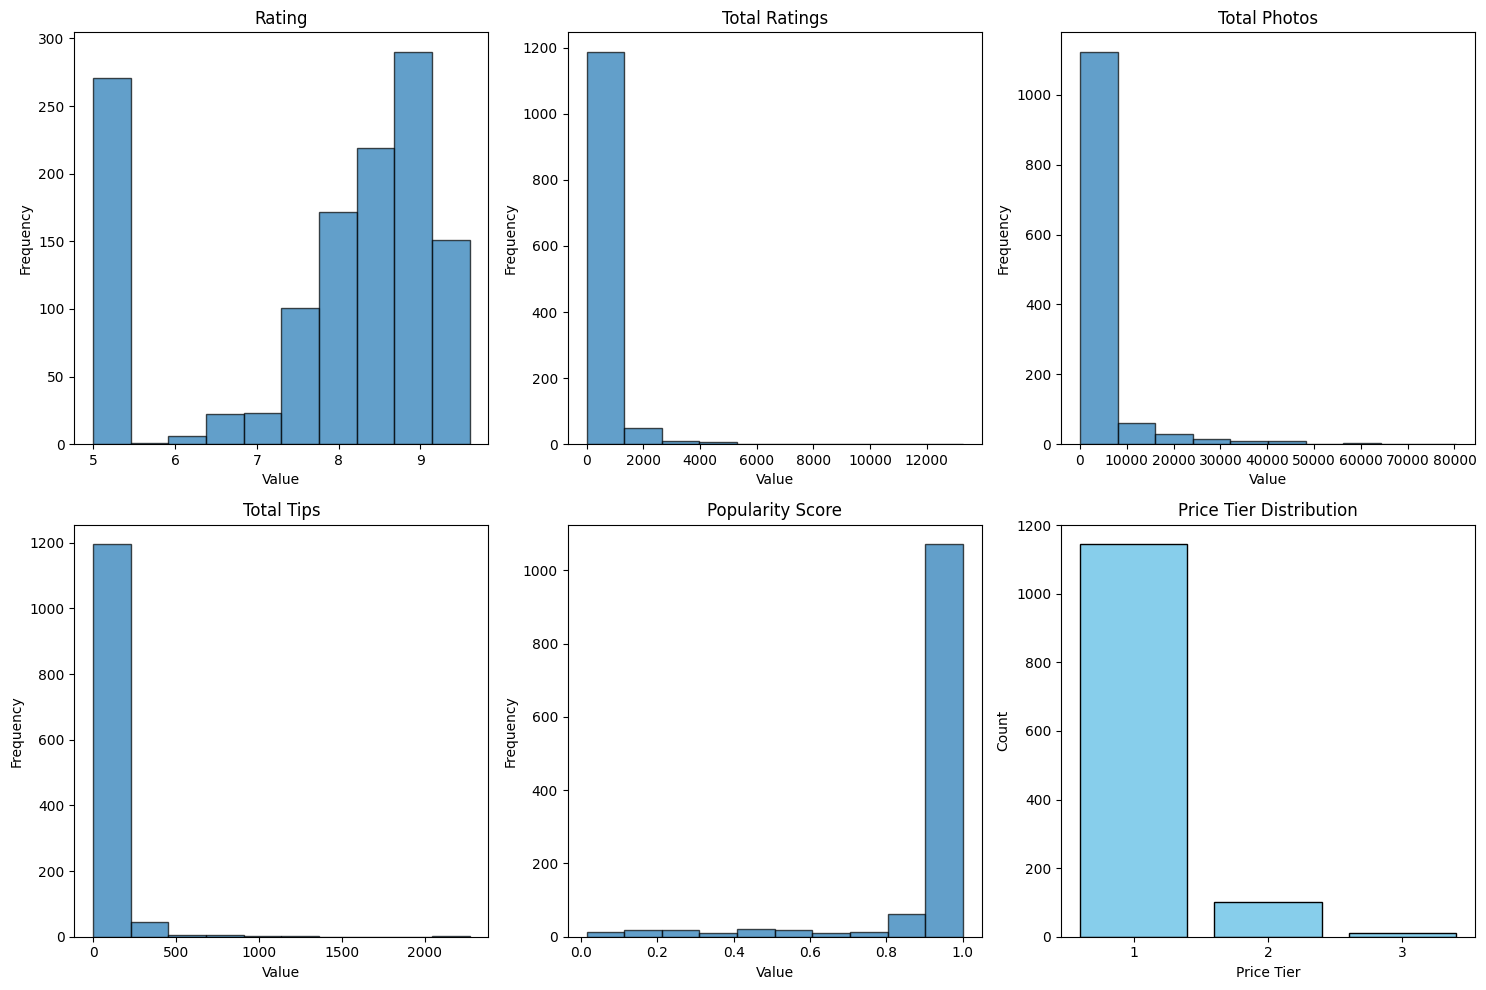

In [314]:
# List of numerical columns for histograms
numerical_columns = ["Rating", "Total Ratings", "Total Photos", "Total Tips", "Popularity Score"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    axes[i].hist(df_coffee[column], bins=10, edgecolor="black", alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Bar chart for Price Tier
price_tier_counts = df_coffee["Price Tier"].value_counts().sort_index()
axes[-1].set_xticks(price_tier_counts.index)
axes[-1].bar(price_tier_counts.index, price_tier_counts.values, color="skyblue", edgecolor="black")
axes[-1].set_title("Price Tier Distribution")
axes[-1].set_xlabel("Price Tier")
axes[-1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

### Restaurants

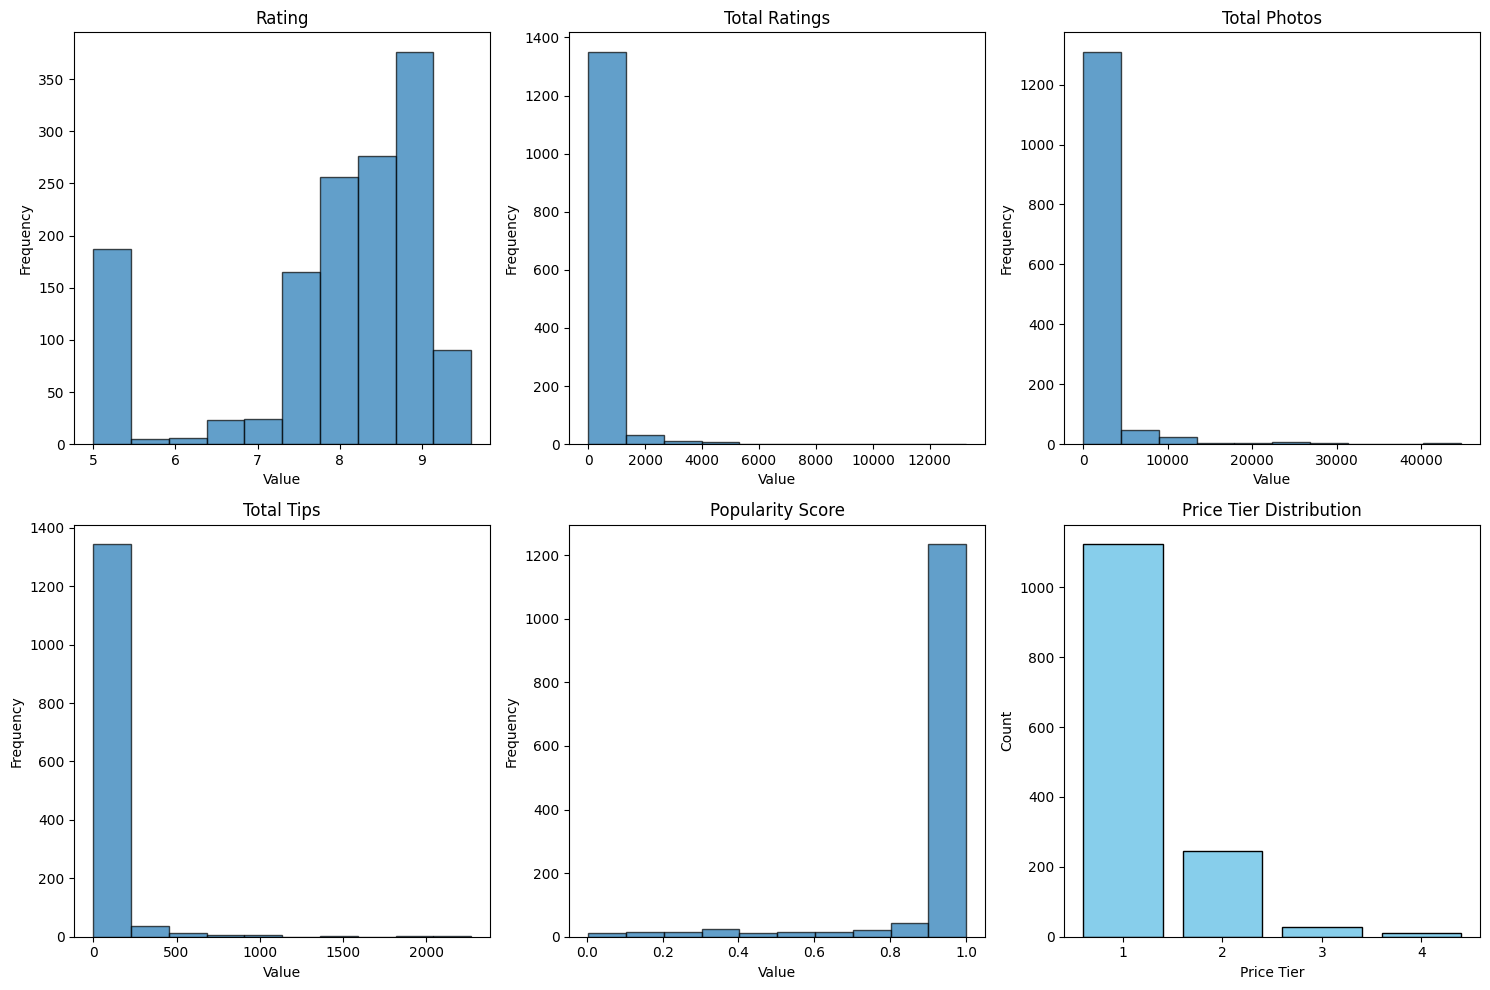

In [315]:
# List of numerical columns for histograms
numerical_columns = ["Rating", "Total Ratings", "Total Photos", "Total Tips", "Popularity Score"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    axes[i].hist(df_rest[column], bins=10, edgecolor="black", alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Bar chart for Price Tier
price_tier_counts = df_rest["Price Tier"].value_counts().sort_index()
axes[-1].set_xticks(price_tier_counts.index)
axes[-1].bar(price_tier_counts.index, price_tier_counts.values, color="skyblue", edgecolor="black")
axes[-1].set_title("Price Tier Distribution")
axes[-1].set_xlabel("Price Tier")
axes[-1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

### Venues

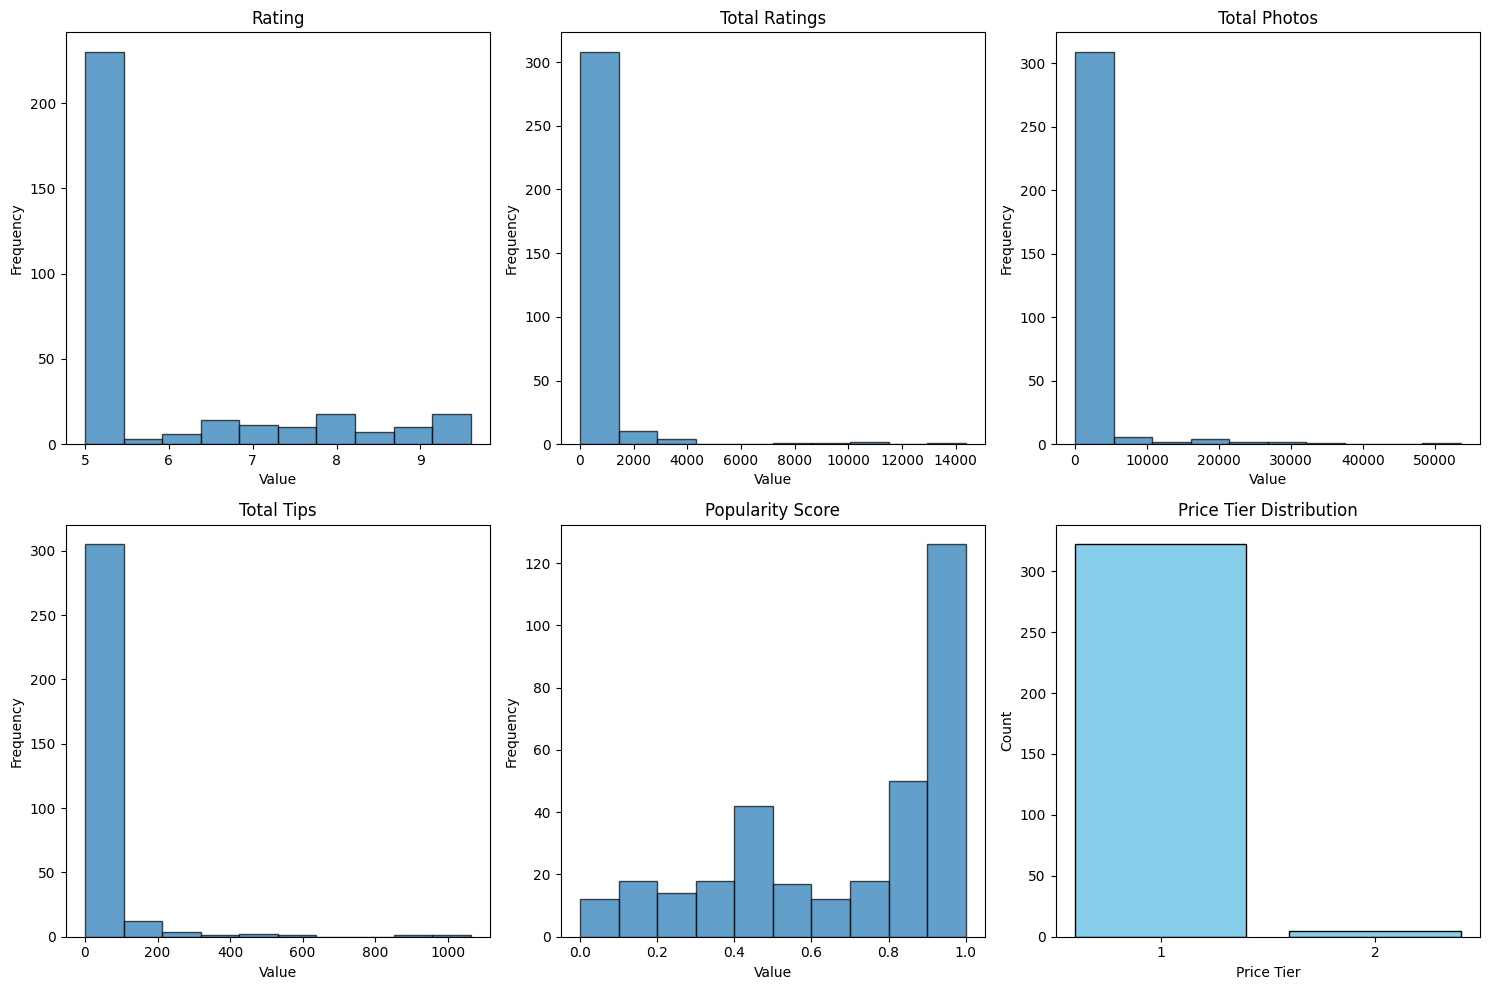

In [316]:
# List of numerical columns for histograms
numerical_columns = ["Rating", "Total Ratings", "Total Photos", "Total Tips", "Popularity Score"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    axes[i].hist(df_venue[column], bins=10, edgecolor="black", alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Bar chart for Price Tier
price_tier_counts = df_venue["Price Tier"].value_counts().sort_index()
axes[-1].set_xticks(price_tier_counts.index)
axes[-1].bar(price_tier_counts.index, price_tier_counts.values, color="skyblue", edgecolor="black")
axes[-1].set_title("Price Tier Distribution")
axes[-1].set_xlabel("Price Tier")
axes[-1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

### 2. Univariate Non-Graphical analysis: 


## 4. Bivariate/Multivariate Analysis:


### 1. Bivariate/Multivariat Graphical Analysis:

#### Coffee Shops

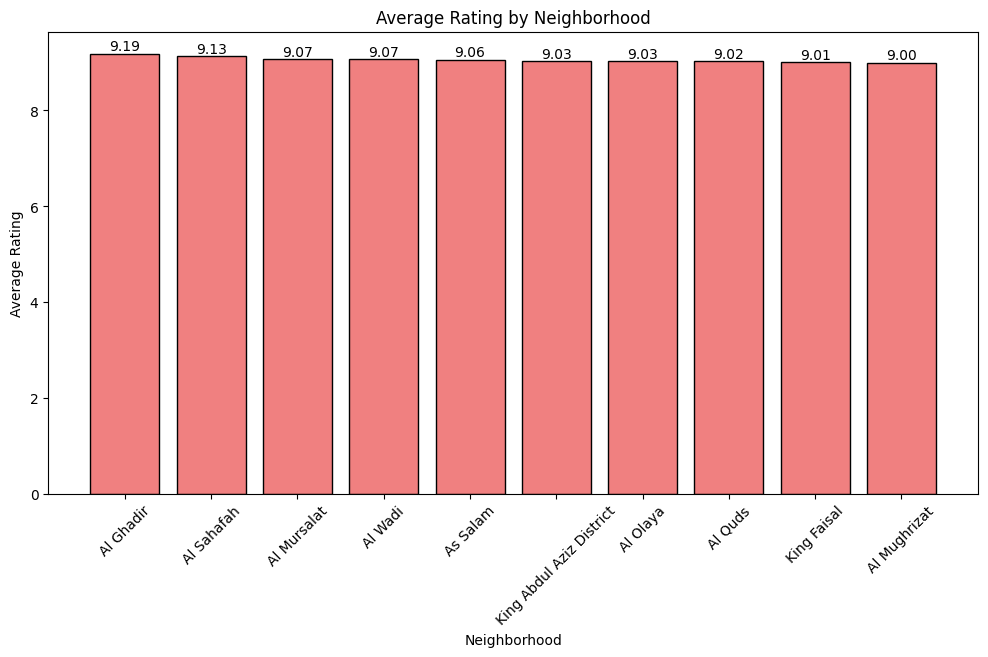

In [317]:
# Group by Neighborhood and get average rating
avg_rating_by_neighborhood = df_coffee.groupby("Neighborhood")["Rating"].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for annotation
avg_rating_df = avg_rating_by_neighborhood.reset_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_rating_df['Neighborhood'], avg_rating_df['Rating'], color='lightcoral', edgecolor='black')

# Annotate bars with exact ratings
for bar, rating in zip(bars, avg_rating_df['Rating']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rating:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Average Rating by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

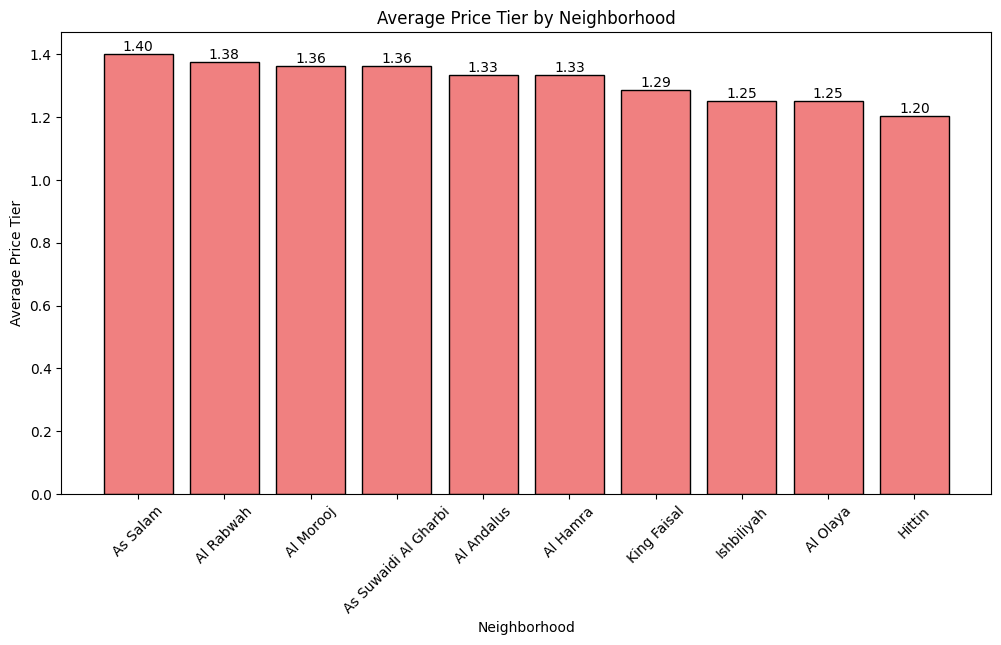

In [318]:
# Highest Average Price Tier by Neighborhood
avg_price_by_neighborhood = df_coffee.groupby("Neighborhood")["Price Tier"].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for annotation
avg_price_df = avg_price_by_neighborhood.reset_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_df['Neighborhood'], avg_price_df['Price Tier'], color='lightcoral', edgecolor='black')

# Annotate bars with exact price tier values
for bar, price in zip(bars, avg_price_df['Price Tier']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{price:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Average Price Tier by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price Tier")
plt.xticks(rotation=45)
plt.show()

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/1883616043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_coffee['Price Tier'], y=df_coffee['Rating'], palette='coolwarm')


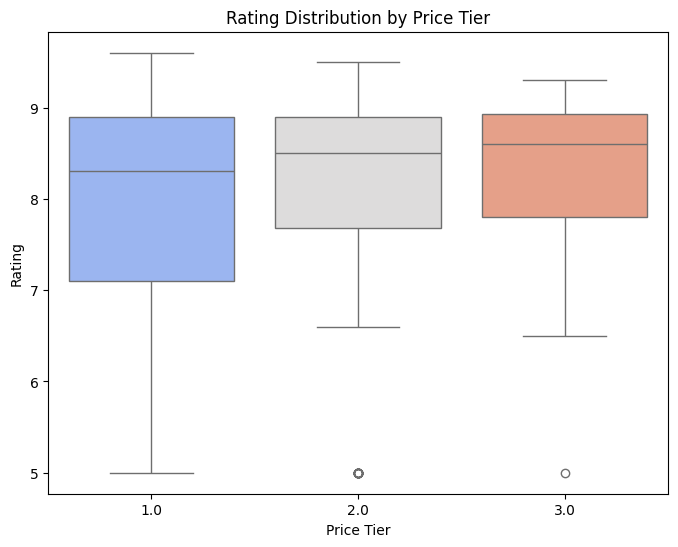

In [319]:
# Rating vs. Price Tier
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_coffee['Price Tier'], y=df_coffee['Rating'], palette='coolwarm')
plt.title("Rating Distribution by Price Tier")
plt.xlabel("Price Tier")
plt.ylabel("Rating")
plt.show()

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/2028844584.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_reviewed['Name'], x=most_reviewed['Total Ratings'], palette='coolwarm')


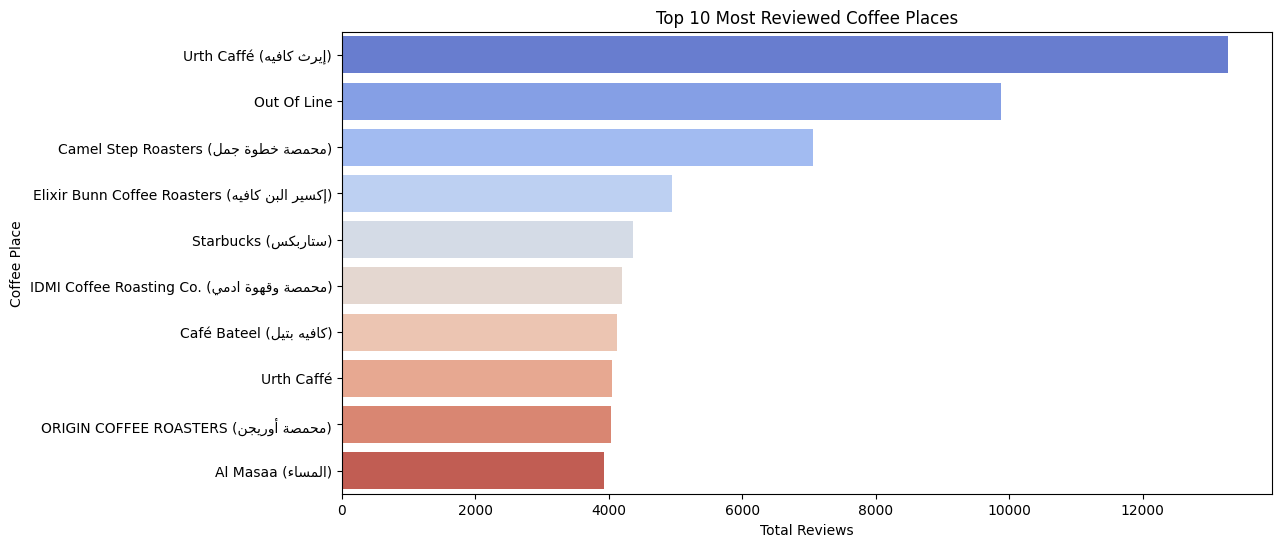

In [320]:
# Most reviewed coffee places in Riyadh
from bidi.algorithm import get_display
import arabic_reshaper

most_reviewed = df_coffee[["Name", "Total Ratings"]].sort_values(by="Total Ratings", ascending=False).head(10)
most_reviewed["Name"] = most_reviewed["Name"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

plt.figure(figsize=(12, 6))
sns.barplot(y=most_reviewed['Name'], x=most_reviewed['Total Ratings'], palette='coolwarm')
plt.title("Top 10 Most Reviewed Coffee Places")
plt.xlabel("Total Reviews")
plt.ylabel("Coffee Place")
plt.show()

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/443815687.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=hidden_gems['Name'], x=hidden_gems['Rating'], palette='coolwarm')


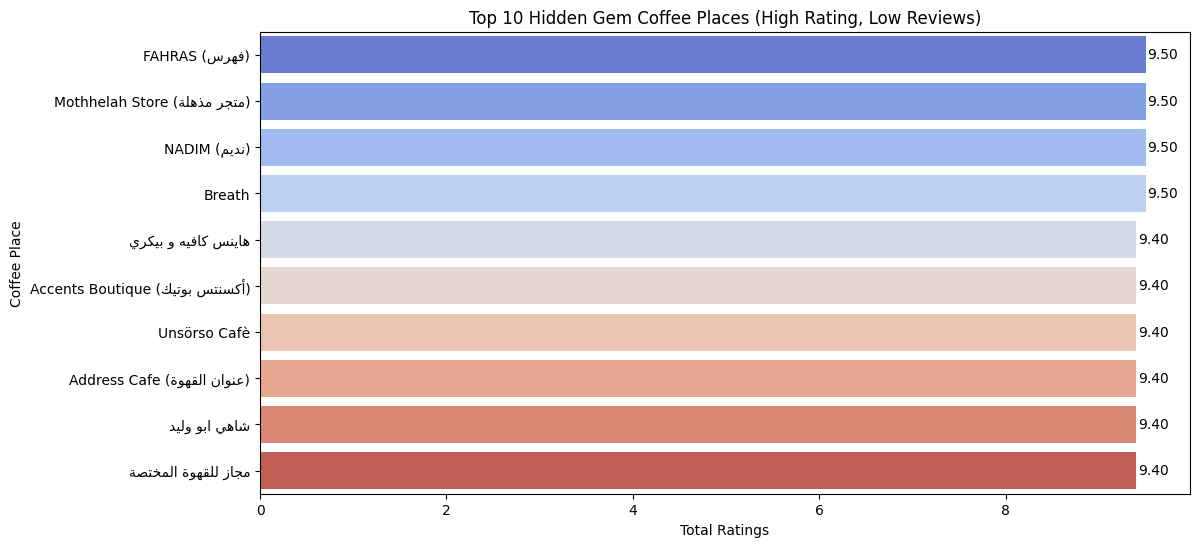

In [321]:
# Hidden gems: Highly rated but less reviewed places
from bidi.algorithm import get_display
import arabic_reshaper

# Hidden gems: Highly rated but less reviewed places
hidden_gems = df_coffee[(df_coffee['Total Ratings'] < df_coffee['Total Ratings'].mean()) & (df_coffee['Total Ratings'] > df_coffee['Total Ratings'].median())].sort_values(by=['Rating', 'Popularity Score', 'Total Ratings'], ascending=[False, True, True]).head(10)

# Fix Arabic text direction
hidden_gems['Name'] = hidden_gems['Name'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(12, 6))
bars = sns.barplot(y=hidden_gems['Name'], x=hidden_gems['Rating'], palette='coolwarm')

# Annotate bars with exact ratings
for bar, rating in zip(bars.patches, hidden_gems['Rating']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{rating:.2f}', ha='left', va='center', fontsize=10)
plt.title("Top 10 Hidden Gem Coffee Places (High Rating, Low Reviews)")
plt.xlabel("Total Ratings")
plt.ylabel("Coffee Place")
plt.show()

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/74851647.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=riyadh_hot_spots['Name'], x=riyadh_hot_spots['Popularity Score'], palette='coolwarm')


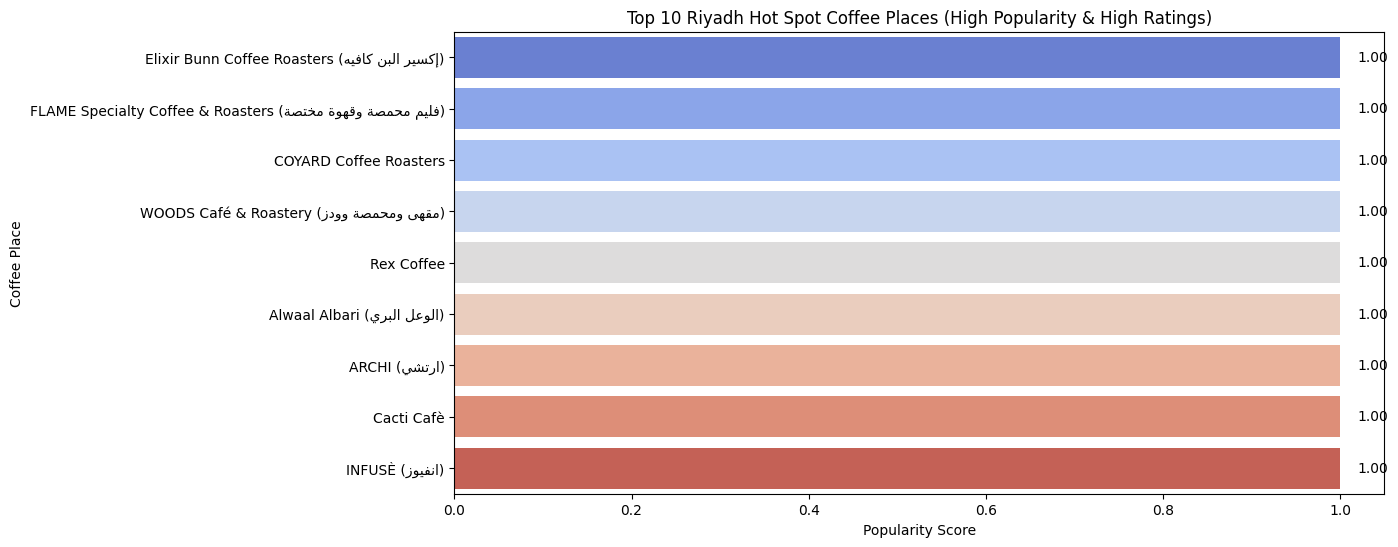

In [322]:
# Riyadh Hot Spots: Most Popular Coffee Places
riyadh_hot_spots = df_coffee[(df_coffee['Total Ratings'] > df_coffee['Total Ratings'].mean()) & 
                             (df_coffee['Popularity Score'] > df_coffee['Popularity Score'].mean())] \
                   .sort_values(by=['Popularity Score', 'Total Ratings'], ascending=[False, False]).head(10)

# Fix Arabic text direction
riyadh_hot_spots['Name'] = riyadh_hot_spots['Name'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

plt.figure(figsize=(12, 6))
bars = sns.barplot(y=riyadh_hot_spots['Name'], x=riyadh_hot_spots['Popularity Score'], palette='coolwarm')

# Annotate bars with exact popularity scores
for bar, score in zip(bars.patches, riyadh_hot_spots['Popularity Score']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{score:.2f}', ha='left', va='center', fontsize=10)

plt.title("Top 10 Riyadh Hot Spot Coffee Places (High Popularity & High Ratings)")
plt.xlabel("Popularity Score")
plt.ylabel("Coffee Place")
plt.show()


#### Restaurants

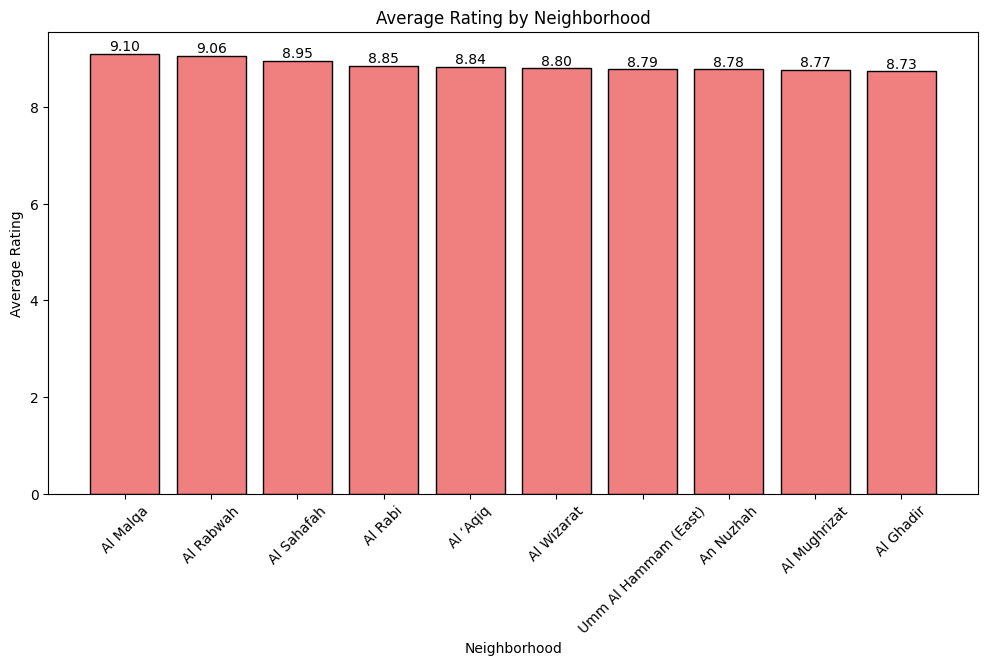

In [323]:
# Group by Neighborhood and get average rating
avg_rating_by_neighborhood = df_rest.groupby("Neighborhood")["Rating"].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for annotation
avg_rating_df = avg_rating_by_neighborhood.reset_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_rating_df['Neighborhood'], avg_rating_df['Rating'], color='lightcoral', edgecolor='black')

# Annotate bars with exact ratings
for bar, rating in zip(bars, avg_rating_df['Rating']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rating:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Average Rating by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

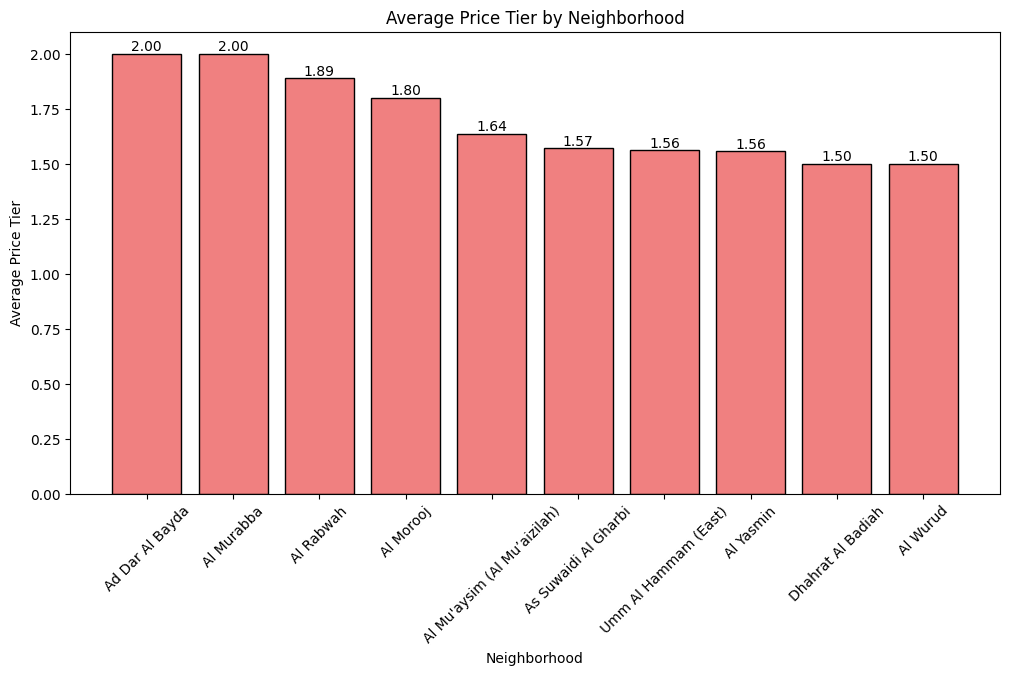

In [324]:
# Highest Average Price Tier by Neighborhood
avg_price_by_neighborhood = df_rest.groupby("Neighborhood")["Price Tier"].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for annotation
avg_price_df = avg_price_by_neighborhood.reset_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_df['Neighborhood'], avg_price_df['Price Tier'], color='lightcoral', edgecolor='black')

# Annotate bars with exact price tier values
for bar, price in zip(bars, avg_price_df['Price Tier']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{price:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Average Price Tier by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price Tier")
plt.xticks(rotation=45)
plt.show()

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/622340015.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=hidden_gems['Name'], x=hidden_gems['Rating'], palette='coolwarm')


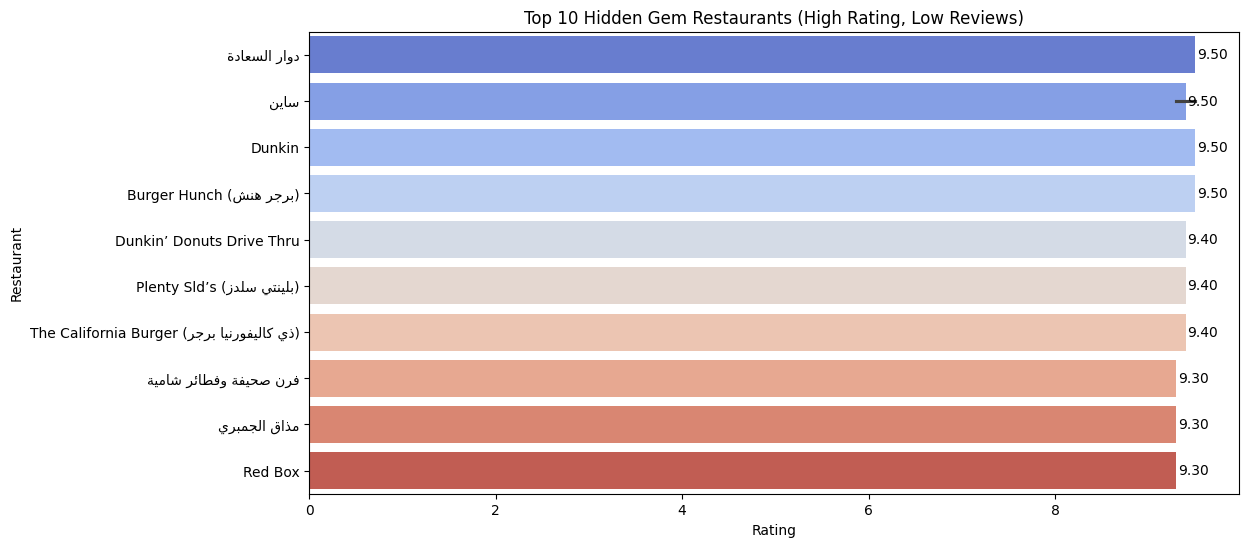

In [325]:
# Hidden gems: Highly rated but less reviewed places
hidden_gems = df_rest[(df_rest['Total Ratings'] < df_rest['Total Ratings'].mean()) & (df_rest['Total Ratings'] > df_rest['Total Ratings'].median()) & (~df_rest['FSQ_ID'].isin(df_coffee['FSQ_ID']))].sort_values(by=['Rating', 'Popularity Score', 'Total Ratings'], ascending=[False, True, True]).head(11)

# Fix Arabic text direction
hidden_gems['Name'] = hidden_gems['Name'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(12, 6))
bars = sns.barplot(y=hidden_gems['Name'], x=hidden_gems['Rating'], palette='coolwarm')

# Annotate bars with exact ratings
for bar, rating in zip(bars.patches, hidden_gems['Rating']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{rating:.2f}', ha='left', va='center', fontsize=10)
plt.title("Top 10 Hidden Gem Restaurants (High Rating, Low Reviews)")
plt.xlabel("Rating")
plt.ylabel("Restaurant")
plt.show()

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/1970820484.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=riyadh_hot_spots['Name'], x=riyadh_hot_spots['Popularity Score'], palette='coolwarm')


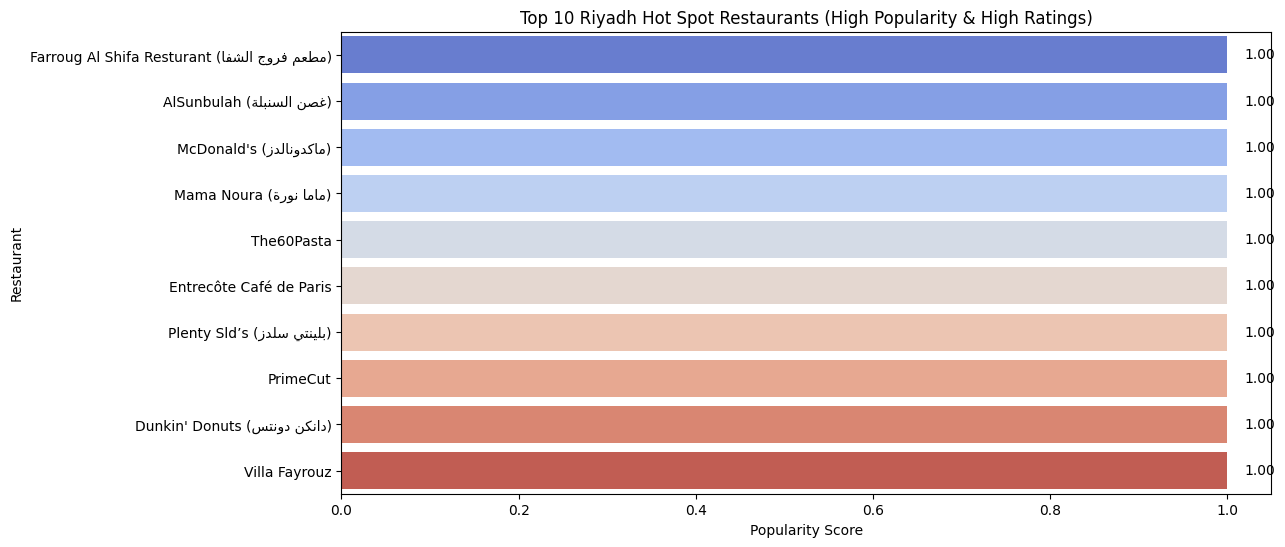

In [326]:
riyadh_hot_spots = df_rest[(df_rest['Total Ratings'] > df_rest['Total Ratings'].mean()) & 
                           (df_rest['Popularity Score'] > df_rest['Popularity Score'].mean()) & 
                           (~df_rest['FSQ_ID'].isin(df_coffee['FSQ_ID']))] \
                   .sort_values(by=['Popularity Score', 'Total Ratings'], ascending=[False, False]).head(10)

# Fix Arabic text direction
riyadh_hot_spots['Name'] = riyadh_hot_spots['Name'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

plt.figure(figsize=(12, 6))
bars = sns.barplot(y=riyadh_hot_spots['Name'], x=riyadh_hot_spots['Popularity Score'], palette='coolwarm')

# Annotate bars with exact popularity scores
for bar, score in zip(bars.patches, riyadh_hot_spots['Popularity Score']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{score:.2f}', ha='left', va='center', fontsize=10)

plt.title("Top 10 Riyadh Hot Spot Restaurants (High Popularity & High Ratings)")
plt.xlabel("Popularity Score")
plt.ylabel("Restaurant")
plt.show()

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/3367967526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=highest_rated_categories.index, x=highest_rated_categories.values, palette='coolwarm')


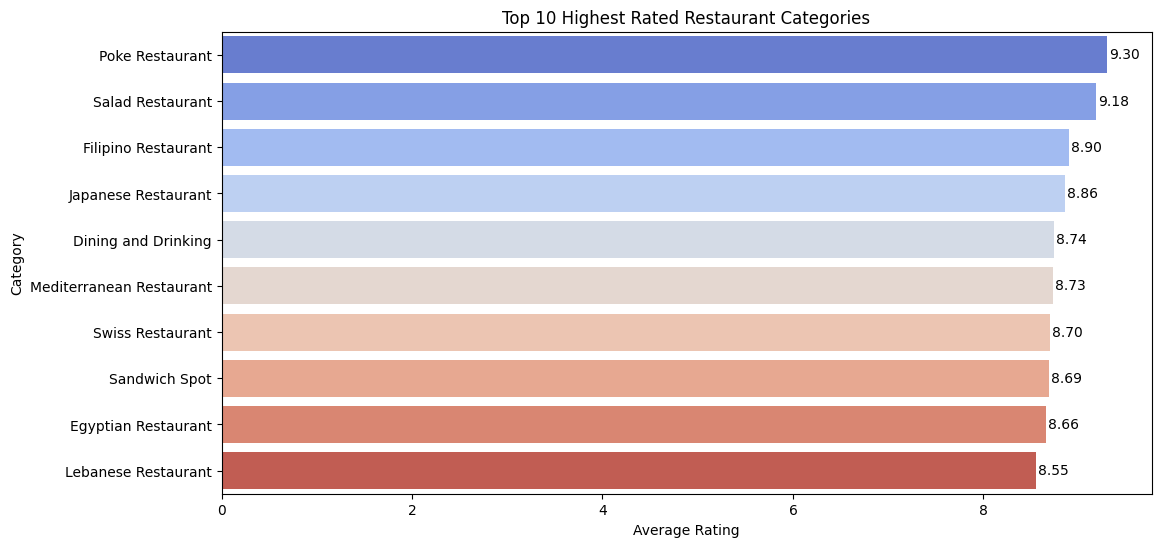

In [327]:
# Highest-rated restaurant categories
highest_rated_categories = df_rest.groupby("Category")["Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
bars = sns.barplot(y=highest_rated_categories.index, x=highest_rated_categories.values, palette='coolwarm')

# Annotate bars with exact ratings
for bar, rating in zip(bars.patches, highest_rated_categories.values):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{rating:.2f}', ha='left', va='center', fontsize=10)

plt.title("Top 10 Highest Rated Restaurant Categories")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()

#### Venues

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_37626/2363892336.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=top_malls_shops['Name'], x=top_malls_shops['Popularity Score'], palette='coolwarm')


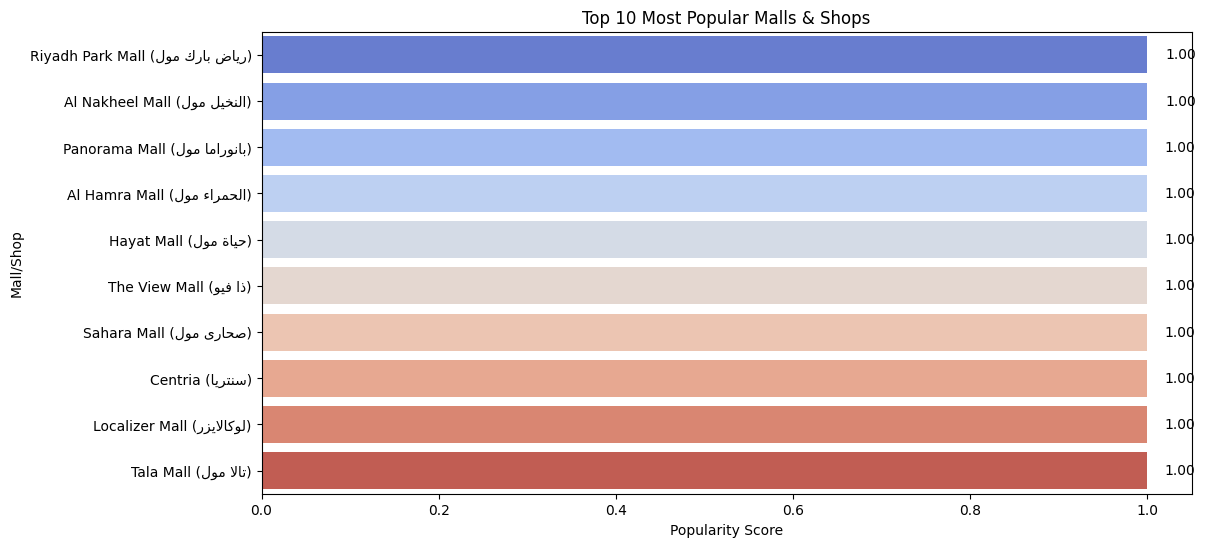

In [328]:
# Most Popular Malls & Shops (Based on Popularity Score)
malls_and_shops = df_venue[df_venue['Category'].str.contains('Mall|Shop', case=False, na=False)]
top_malls_shops = malls_and_shops.sort_values(by='Popularity Score', ascending=False).head(10)

# Fix Arabic text direction
top_malls_shops['Name'] = top_malls_shops['Name'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(12, 6))
bars = sns.barplot(y=top_malls_shops['Name'], x=top_malls_shops['Popularity Score'], palette='coolwarm')

# Annotate bars with exact popularity scores
for bar, score in zip(bars.patches, top_malls_shops['Popularity Score']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{score:.2f}', ha='left', va='center', fontsize=10)

plt.title("Top 10 Most Popular Malls & Shops")
plt.xlabel("Popularity Score")
plt.ylabel("Mall/Shop")
plt.show()

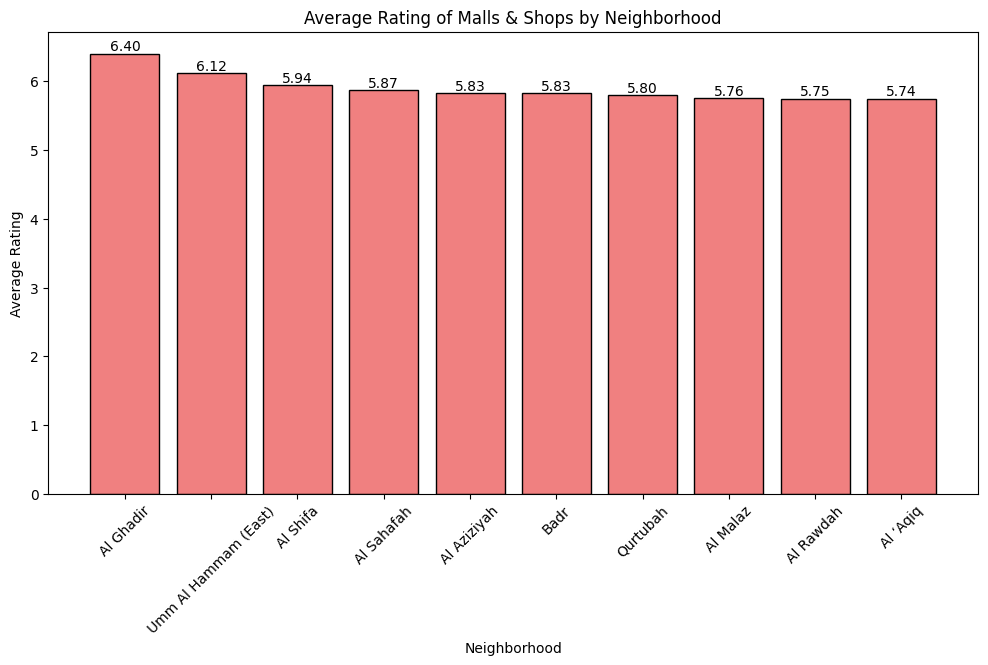

In [329]:
# Average Rating of Malls & Shops by Neighborhood
avg_mall_shop_rating = malls_and_shops.groupby("Neighborhood")["Rating"].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for annotation
avg_mall_shop_df = avg_mall_shop_rating.reset_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_mall_shop_df['Neighborhood'], avg_mall_shop_df['Rating'], color='lightcoral', edgecolor='black')

# Annotate bars with exact ratings
for bar, rating in zip(bars, avg_mall_shop_df['Rating']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rating:.2f}', ha='center', va='bottom', fontsize=10)
plt.title("Average Rating of Malls & Shops by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

### 2. Bivariate/Multivariat Non-Graphical analysis:

## ML Models

In [330]:
df_coffee.dtypes

Neighborhood             object
FSQ_ID                   object
Name                     object
Address                  object
Locality                 object
Region                   object
Country                  object
Latitude                float64
Longitude               float64
Category                 object
Rating                  float64
Total Ratings             int64
Total Photos              int64
Total Tips                int64
Popularity Score        float64
Verified                   bool
Website                  object
Telephone                object
Price Tier              float64
Hours                    object
Popular Hours            object
Social Media             object
Timezone                 object
Nearest Neighborhood     object
dtype: object

In [331]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



def feature_engineering(df):
    """Create new features for ranking places."""
    
    df = df.copy()  # Prevent modifying the original dataframe

    # Engagement Score (Log-transformed interactions)
    df['Engagement Score'] = np.log1p(df['Total Ratings']) + np.log1p(df['Total Photos']) + np.log1p(df['Total Tips'])
    
    # Review Quality Score (Balances high ratings with review count)
    max_ratings_log = np.log1p(df['Total Ratings']).max()
    df['Review Quality Score'] = df['Rating'] * (np.log1p(df['Total Ratings']) / max_ratings_log)
    
    # Trendiness Score (Robust Z-score)
    iqr = df['Total Ratings'].quantile(0.75) - df['Total Ratings'].quantile(0.25)
    median_ratings = df['Total Ratings'].median()
    df['Trendiness Score'] = (df['Total Ratings'] - median_ratings) / (iqr + 1)  # Adding 1 to prevent division by zero

    # Normalize Popularity Score
    df['Popularity Score Norm'] = df['Popularity Score'] / df['Popularity Score'].max()

    # Local Favorite Score (Balances high rating & lower popularity)
    df['Local Favorite Score'] = df['Rating'] * (1 - df['Popularity Score Norm'])

    # Drop NaN values (if any)
    df = df.dropna()

    return df

# Create a new dataframe so the original `df_coffee` is not changed
df_coffee_model = feature_engineering(df_coffee)


/opt/anaconda3/envs/leaflet_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [332]:
# Define features for training
features = ['Rating', 'Engagement Score', 'Review Quality Score', 'Trendiness Score', 'Popularity Score Norm', 'Local Favorite Score']
target = 'Predicted Score'  # We are predicting a ranking score

# The model will learn how to rank places instead of using a manual formula
df_coffee_model['Predicted Score'] = (
    0.3 * df_coffee_model['Rating'] + 
    0.2 * df_coffee_model['Engagement Score'] + 
    0.15 * df_coffee_model['Review Quality Score'] + 
    0.15 * df_coffee_model['Trendiness Score'] + 
    0.1 * df_coffee_model['Popularity Score Norm'] + 
    0.1 * df_coffee_model['Local Favorite Score']
)

# Standardize features (important for models like Neural Networks, optional for Random Forest)
# scaler = StandardScaler()
# df_coffee_model[features] = scaler.fit_transform(df_coffee_model[features])


In [333]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_coffee_model[features], df_coffee_model[target], test_size=0.2, random_state=42)


In [334]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_leaf=5, random_state=42)

# Perform 5-Fold Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Train the model on full training data
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Compute test RMSE and R² Score
rf_rmse = mean_squared_error(y_test, y_pred_rf) ** 0.5
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"🔹 Random Forest - RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")
print(f"🔹 Random Forest - Average CV RMSE: {-cv_scores_rf.mean():.4f}")


🔹 Random Forest - RMSE: 0.1376, R²: 0.9969
🔹 Random Forest - Average CV RMSE: 0.2436


In [335]:
# Make predictions for all places
df_coffee_model['Predicted Ranking Score'] = rf_model.predict(df_coffee_model[features])

# Sort places by predicted ranking score
df_ranked_rf = df_coffee_model.sort_values(by='Predicted Ranking Score', ascending=False)

# Show top recommended places
print("🔹 Top Recommended Places (Random Forest Model):")
display(df_ranked_rf[['Name', 'Rating', 'Predicted Ranking Score']].head(30))


🔹 Top Recommended Places (Random Forest Model):


,Name,Rating,Predicted Ranking Score
129,Elixir Bunn Coffee Roasters (ﺇﻛﺴﻴﺮ ﺍﻟﺒﻦ ﻛﺎﻓﻴﻪ),9.3,13.782126
532,IDMI Coffee Roasting Co. (ﻣﺤﻤﺼﺔ ﻭﻗﻬﻮﺓ ﺍﺩﻣﻲ),9.4,13.782126
178,Out Of Line,9.6,13.782126
174,Camel Step Roasters (ﻣﺤﻤﺼﺔ ﺧﻄﻮﺓ ﺟﻤﻞ),9.2,13.782126
911,Urth Caffé (ﺇﻳﺮﺙ ﻛﺎﻓﻴﻪ),9.1,13.782126
535,Urth Caffé,9.3,13.414853
77,Starbucks (ﺳﺘﺎﺭﺑﻜﺲ),9.1,13.227522
41,ORIGIN COFFEE ROASTERS (ﻣﺤﻤﺼﺔ ﺃﻭﺭﻳﺠﻦ),8.9,13.145738
568,Café Bateel (ﻛﺎﻓﻴﻪ ﺑﺘﻴﻞ),8.9,12.807908
531,Camel Step Roasters (ﻣﺤﻤﺼﺔ ﺧﻄﻮﺓ ﺟﻤﻞ),9.5,12.211138


In [336]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

# Perform 5-Fold Cross-Validation
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Train the model on full training data
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_model.predict(X_test)

# Compute test RMSE and R² Score
gb_rmse = mean_squared_error(y_test, y_pred_gb) ** 0.5
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"🔹 Gradient Boosting - RMSE: {gb_rmse:.4f}, R²: {gb_r2:.4f}")
print(f"🔹 Gradient Boosting - Average CV RMSE: {-cv_scores_gb.mean():.4f}")


🔹 Gradient Boosting - RMSE: 0.0769, R²: 0.9990
🔹 Gradient Boosting - Average CV RMSE: 0.1273


In [337]:
from sklearn.linear_model import Lasso, Ridge

# Initialize models with regularization (alpha = strength of regularization)
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=1.0)

# Train the models
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Compute RMSE and R² Score
lasso_rmse = mean_squared_error(y_test, y_pred_lasso) ** 0.5
lasso_r2 = r2_score(y_test, y_pred_lasso)

ridge_rmse = mean_squared_error(y_test, y_pred_ridge) ** 0.5
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"🔹 Lasso Regression - RMSE: {lasso_rmse:.4f}, R²: {lasso_r2:.4f}")
print(f"🔹 Ridge Regression - RMSE: {ridge_rmse:.4f}, R²: {ridge_r2:.4f}")


🔹 Lasso Regression - RMSE: 0.1614, R²: 0.9958
🔹 Ridge Regression - RMSE: 0.0023, R²: 1.0000


In [338]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_scores_ridge = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print(f"🔹 Lasso Regression - Average CV RMSE: {-cv_scores_lasso.mean():.4f}")
print(f"🔹 Ridge Regression - Average CV RMSE: {-cv_scores_ridge.mean():.4f}")


🔹 Lasso Regression - Average CV RMSE: 0.1581
🔹 Ridge Regression - Average CV RMSE: 0.0021


In [339]:
df_coffee.dtypes

Neighborhood             object
FSQ_ID                   object
Name                     object
Address                  object
Locality                 object
Region                   object
Country                  object
Latitude                float64
Longitude               float64
Category                 object
Rating                  float64
Total Ratings             int64
Total Photos              int64
Total Tips                int64
Popularity Score        float64
Verified                   bool
Website                  object
Telephone                object
Price Tier              float64
Hours                    object
Popular Hours            object
Social Media             object
Timezone                 object
Nearest Neighborhood     object
dtype: object

In [340]:
# import pandas as pd
# import numpy as np
# from math import radians, cos, sin, asin, sqrt
# import ipywidgets as widgets
# from IPython.display import display, clear_output

# # --- Helper Functions ---

# def haversine_distance(lat1, lon1, lat2, lon2):
#     """Calculate the great circle distance (in km) between two points on Earth."""
#     lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
#     dlat = lat2 - lat1 
#     dlon = lon2 - lon1 
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * asin(sqrt(a))
#     r = 6371  # Radius of Earth in km
#     return c * r

# def min_max_scale(series):
#     """Perform min-max scaling; if constant, return a series of 1's."""
#     diff = series.max() - series.min()
#     if diff == 0:
#         return pd.Series([1] * len(series), index=series.index)
#     return (series - series.min()) / diff

# def weighted_cosine_similarity(u, v, weights, eps=1e-8):
#     """
#     Compute weighted cosine similarity between vectors u and v.
#     Each element is multiplied by the square root of its weight.
#     A small epsilon prevents division by zero.
#     """
#     weighted_u = u * np.sqrt(weights)
#     weighted_v = v * np.sqrt(weights)
#     dot_product = np.dot(weighted_u, weighted_v)
#     norm_u = np.linalg.norm(weighted_u) + eps
#     norm_v = np.linalg.norm(weighted_v) + eps
#     return dot_product / (norm_u * norm_v)

# # --- Neighborhoods in Riyadh (name, lat, lon) ---
# riyadh = [
#     ("Al Sahafah", 24.8067, 46.6285),
#     ("Al Rabi", 24.8000, 46.6500),
#     ("Al Nada", 24.8300, 46.6600),
#     ("Al Narjis", 24.8868, 46.6453),
#     ("Al ‘Arid", 24.9410, 46.5580),
#     ("Al Nafil", 24.8130, 46.6250),
#     ("Al ‘Aqiq", 24.7700, 46.5850),
#     ("Al Wadi", 24.7900, 46.6170),
#     ("Al Ghadir", 24.7560, 46.6530),
#     ("Al Yasmin", 24.8260, 46.6130),
#     ("Al Falah", 24.8340, 46.6550),
#     ("Banban", 25.1000, 46.5000),
#     ("Al Qirawan", 24.8620, 46.5580),
#     ("Hittin", 24.7730, 46.5710),
#     ("Al Malqa", 24.8008, 46.5977),
#     ("Al Khair", 25.0409, 46.4677),
#     ("Al Rawdah", 24.7540, 46.7980),
#     ("Al Rimal", 24.8600, 46.8570),
#     ("Al Munsiyah", 24.8320, 46.8250),
#     ("Qurtubah", 24.8060, 46.7820),
#     ("Al Janadriyah", 24.9040, 46.8570),
#     ("Al Qadisiyah", 24.7890, 46.8840),
#     ("Al Yarmuk", 24.7680, 46.8770),
#     ("Ghirnatah (Granada)", 24.7800, 46.7610),
#     ("Ishbiliyah", 24.7660, 46.8090),
#     ("Al Hamra", 24.7520, 46.8090),
#     ("Al Mu'aysim (Al Mu’aizilah)", 24.7840, 46.8460),
#     ("Al Khaleej", 24.7450, 46.8280),
#     ("King Faisal", 24.7340, 46.8210),
#     ("Al Quds", 24.7340, 46.7970),
#     ("An Nahdah", 24.7230, 46.8330),
#     ("Al Andalus", 24.7190, 46.8100),
#     ("East Al Naseem", 24.7450, 46.8250),
#     ("West Al Naseem", 24.7450, 46.7940),
#     ("As Salam", 24.7260, 46.7710),
#     ("Ar Rayyan", 24.7190, 46.8060),
#     ("Umm Al Hammam (East)", 24.6680, 46.6580),
#     ("Umm Al Hammam (West)", 24.6690, 46.6370),
#     ("Al Aziziyah", 24.5700, 46.7620),
#     ("Taybah (Al Taibah)", 24.5010, 46.8090),
#     ("Al Misfalah (Al Masfah)", 24.4800, 46.9130),
#     ("Ad Dar Al Bayda", 24.5010, 46.8370),
#     ("Al Shifa", 24.5655, 46.6947),
#     ("Badr", 24.5400, 46.6690),
#     ("Al Marwah", 24.5200, 46.7100),
#     ("Al Fawaz", 24.5060, 46.6540),
#     ("Al Hazm", 24.5340, 46.5890),
#     ("Al Mansuriyah", 24.4740, 46.5530),
#     ("Dirab", 24.5170, 46.5230),
#     ("Al Ha’ir", 24.3740, 46.8000),
#     ("Al Uraija", 24.5930, 46.5590),
#     ("Al Uraija Al Wusta", 24.5800, 46.5320),
#     ("Al Uraija Al Gharbiyyah", 24.5830, 46.5080),
#     ("Hijrat Wadi Laban", 24.5680, 46.4730),
#     ("Dhahrat Laban", 24.6000, 46.4820),
#     ("Shubra", 24.5810, 46.6250),
#     ("As Suwaidi", 24.5820, 46.6250),
#     ("As Suwaidi Al Gharbi", 24.5660, 46.5900),
#     ("Dhahrat Al Badiah", 24.5820, 46.6460),
#     ("Al Badiah", 24.5700, 46.6670),
#     ("Sultana", 24.5680, 46.6260),
#     ("Az Zahra", 24.5520, 46.6170),
#     ("Namar", 24.5500, 46.5400),
#     ("Dhahrat Namar", 24.5620, 46.5620),
#     ("Tuwaiq", 24.5639, 46.5733),
#     ("Al Hazm", 24.5340, 46.5890),
#     ("Al Malaz", 24.6643, 46.7354),
#     ("Al Rabwah", 24.6700, 46.7090),
#     ("Jarir", 24.6550, 46.7320),
#     ("Al Zahra", 24.6480, 46.7170),
#     ("As Safa", 24.6450, 46.7050),
#     ("Adh Dhubbat", 24.6510, 46.7160),
#     ("Al Wizarat", 24.6600, 46.7050),
#     ("Al Faruq", 24.6420, 46.7130),
#     ("Al Amal", 24.6370, 46.7150),
#     ("Thulaim", 24.6310, 46.7130),
#     ("Al Murabba", 24.6490, 46.7080),
#     ("Al Futah", 24.6310, 46.7030),
#     ("Al Morooj", 24.7510, 46.6570),
#     ("Al Mursalat", 24.7490, 46.6860),
#     ("An Nuzhah", 24.7600, 46.6970),
#     ("Al Mughrizat", 24.7640, 46.7250),
#     ("Al Wurud", 24.7160, 46.6550),
#     ("Salah ad-Din", 24.7420, 46.7080),
#     ("King Salman Neighborhood", 24.7403, 46.7144),
#     ("Al Olaya", 24.6957, 46.6811),
#     ("As Sulaymaniyah", 24.6940, 46.6750),
#     ("King Abdul Aziz District", 24.7210, 46.7197)
# ]

# # --- Define Interactive Widgets ---

# # Dropdown for Neighborhood selection with full tuple (name, lat, lon).
# dropdown_neighborhood = widgets.Dropdown(
#     options=[(name, (name, lat, lon)) for name, lat, lon in riyadh],
#     description='Neighborhood:',
#     style={'description_width': 'initial'}
# )

# # Radio buttons for preference.
# radio_preference = widgets.RadioButtons(
#     options=['hidden_gem', 'hot_spot'],
#     description='Preference:',
#     style={'description_width': 'initial'}
# )

# # Slider for maximum radius (km) with a minimum value of 2.
# slider_radius = widgets.FloatSlider(
#     value=5.0,
#     min=2.0,
#     max=20.0,
#     step=0.5,
#     description='Max Radius (km):',
#     style={'description_width': 'initial'}
# )

# # Button to trigger recommendations.
# button_run = widgets.Button(description="Get Recommendations", button_style='success')
# output = widgets.Output()

# # --- Define Recommendation Function ---
# def run_recommendations(b):
#     with output:
#         clear_output()
#         # Retrieve user selections.
#         selected_neighborhood = dropdown_neighborhood.value
#         user_lat, user_lon = selected_neighborhood[1], selected_neighborhood[2]
#         preference = radio_preference.value
#         radius = slider_radius.value
        
#         # Set strictness values always to 1.
#         strictness_type = 1.0
#         strictness_distance = 1.0
        
#         # Weight vector for features: [Rating, Total Ratings, Popularity, Engagement, Distance].
#         weights = np.array([1.0, 1.0, 1.0, 1.0, strictness_distance])
        
#         # --- Data Filtering and Feature Engineering ---
#         df_filtered = df_coffee.copy()
#         df_filtered['distance_km'] = df_filtered.apply(
#             lambda row: haversine_distance(user_lat, user_lon, row['Latitude'], row['Longitude']),
#             axis=1
#         )
#         df_filtered = df_filtered[df_filtered['distance_km'] <= radius].copy()
        
#         # For scoring, if the distance is less than 2, use 2 instead.
#         df_filtered['distance_score'] = df_filtered['distance_km'].apply(lambda d: max(0, 1 - ((d if d >= 2 else 2) / radius)))
        
#         for col in ['Rating', 'Total Ratings', 'Popularity Score', 'Total Photos', 'Total Tips']:
#             df_filtered[col] = df_filtered[col].fillna(0)
        
#         # Normalize quality features.
#         df_filtered['norm_rating'] = df_filtered['Rating'] / 5.0
#         df_filtered['engagement'] = df_filtered['Total Photos'] + df_filtered['Total Tips']
#         df_filtered['norm_engagement'] = min_max_scale(df_filtered['engagement'])
#         df_filtered['norm_total_ratings'] = min_max_scale(df_filtered['Total Ratings'])
#         df_filtered['norm_popularity'] = min_max_scale(df_filtered['Popularity Score'])
        
#         # Adjust quality features based on selected preference.
#         if preference == "hidden_gem":
#             feature_total_ratings = 1 - df_filtered['norm_total_ratings']
#             feature_popularity = 1 - df_filtered['norm_popularity']
#             feature_engagement = 1 - df_filtered['norm_engagement']
#         else:
#             feature_total_ratings = df_filtered['norm_total_ratings']
#             feature_popularity = df_filtered['norm_popularity']
#             feature_engagement = df_filtered['norm_engagement']
        
#         # Build feature vectors: [Rating, Total Ratings, Popularity, Engagement, Distance].
#         df_filtered['feature_total_ratings'] = feature_total_ratings
#         df_filtered['feature_popularity'] = feature_popularity
#         df_filtered['feature_engagement'] = feature_engagement
#         feature_cols = ['norm_rating', 'feature_total_ratings', 'feature_popularity', 'feature_engagement', 'distance_score']
#         X_features = df_filtered[feature_cols].values
        
#         # Ideal vector (all features ideally 1).
#         ideal_vector = np.ones(5)
        
#         # Compute similarity scores.
#         similarity_scores = [weighted_cosine_similarity(ideal_vector, vec, weights) for vec in X_features]
#         df_filtered['similarity_score'] = similarity_scores
        
#         # Boost score for venues in the same neighborhood.
#         bonus_factor = 1.5  # Adjust as needed.
#         df_filtered['similarity_score'] = df_filtered['similarity_score'] * np.where(
#             df_filtered['Nearest Neighborhood'] == selected_neighborhood[0],
#             bonus_factor,
#             1
#         )
        
#         # Display results with the real distance (the 'distance_km' column).
#         df_recommendations = df_filtered.sort_values(by='similarity_score', ascending=False)
#         display(df_recommendations[['Name', 'Nearest Neighborhood', 'Category', 'Rating', 'Total Ratings', 
#                                     'Popularity Score', 'distance_km', 'similarity_score']].head(10))

# # Link the button to the recommendation function.
# button_run.on_click(run_recommendations)

# # --- Display the Interface ---
# widgets.VBox([
#     dropdown_neighborhood,
#     radio_preference,
#     slider_radius,
#     button_run,
#     output
# ])


In [348]:
from ipyleaflet import Map, Marker, Circle, basemaps
import ipywidgets as widgets
from IPython.display import display, clear_output

# Complete list of neighborhoods (name, lat, lon)
riyadh = [
    ("Al Sahafah", 24.8067, 46.6285),
    ("Al Rabi", 24.8000, 46.6500),
    ("Al Nada", 24.8300, 46.6600),
    ("Al Narjis", 24.8868, 46.6453),
    ("Al ‘Arid", 24.9410, 46.5580),
    ("Al Nafil", 24.8130, 46.6250),
    ("Al ‘Aqiq", 24.7700, 46.5850),
    ("Al Wadi", 24.7900, 46.6170),
    ("Al Ghadir", 24.7560, 46.6530),
    ("Al Yasmin", 24.8260, 46.6130),
    ("Al Falah", 24.8340, 46.6550),
    ("Banban", 25.1000, 46.5000),
    ("Al Qirawan", 24.8620, 46.5580),
    ("Hittin", 24.7730, 46.5710),
    ("Al Malqa", 24.8008, 46.5977),
    ("Al Khair", 25.0409, 46.4677),
    ("Al Rawdah", 24.7540, 46.7980),
    ("Al Rimal", 24.8600, 46.8570),
    ("Al Munsiyah", 24.8320, 46.8250),
    ("Qurtubah", 24.8060, 46.7820),
    ("Al Janadriyah", 24.9040, 46.8570),
    ("Al Qadisiyah", 24.7890, 46.8840),
    ("Al Yarmuk", 24.7680, 46.8770),
    ("Ghirnatah (Granada)", 24.7800, 46.7610),
    ("Ishbiliyah", 24.7660, 46.8090),
    ("Al Hamra", 24.7520, 46.8090),
    ("Al Mu'aysim (Al Mu’aizilah)", 24.7840, 46.8460),
    ("Al Khaleej", 24.7450, 46.8280),
    ("King Faisal", 24.7340, 46.8210),
    ("Al Quds", 24.7340, 46.7970),
    ("An Nahdah", 24.7230, 46.8330),
    ("Al Andalus", 24.7190, 46.8100),
    ("East Al Naseem", 24.7450, 46.8250),
    ("West Al Naseem", 24.7450, 46.7940),
    ("As Salam", 24.7260, 46.7710),
    ("Ar Rayyan", 24.7190, 46.8060),
    ("Umm Al Hammam (East)", 24.6680, 46.6580),
    ("Umm Al Hammam (West)", 24.6690, 46.6370),
    ("Al Aziziyah", 24.5700, 46.7620),
    ("Taybah (Al Taibah)", 24.5010, 46.8090),
    ("Al Misfalah (Al Masfah)", 24.4800, 46.9130),
    ("Ad Dar Al Bayda", 24.5010, 46.8370),
    ("Al Shifa", 24.5655, 46.6947),
    ("Badr", 24.5400, 46.6690),
    ("Al Marwah", 24.5200, 46.7100),
    ("Al Fawaz", 24.5060, 46.6540),
    ("Al Hazm", 24.5340, 46.5890),
    ("Al Mansuriyah", 24.4740, 46.5530),
    ("Dirab", 24.5170, 46.5230),
    ("Al Ha’ir", 24.3740, 46.8000),
    ("Al Uraija", 24.5930, 46.5590),
    ("Al Uraija Al Wusta", 24.5800, 46.5320),
    ("Al Uraija Al Gharbiyyah", 24.5830, 46.5080),
    ("Hijrat Wadi Laban", 24.5680, 46.4730),
    ("Dhahrat Laban", 24.6000, 46.4820),
    ("Shubra", 24.5810, 46.6250),
    ("As Suwaidi", 24.5820, 46.6250),
    ("As Suwaidi Al Gharbi", 24.5660, 46.5900),
    ("Dhahrat Al Badiah", 24.5820, 46.6460),
    ("Al Badiah", 24.5700, 46.6670),
    ("Sultana", 24.5680, 46.6260),
    ("Az Zahra", 24.5520, 46.6170),
    ("Namar", 24.5500, 46.5400),
    ("Dhahrat Namar", 24.5620, 46.5620),
    ("Tuwaiq", 24.5639, 46.5733),
    ("Al Hazm", 24.5340, 46.5890),
    ("Al Malaz", 24.6643, 46.7354),
    ("Al Rabwah", 24.6700, 46.7090),
    ("Jarir", 24.6550, 46.7320),
    ("Al Zahra", 24.6480, 46.7170),
    ("As Safa", 24.6450, 46.7050),
    ("Adh Dhubbat", 24.6510, 46.7160),
    ("Al Wizarat", 24.6600, 46.7050),
    ("Al Faruq", 24.6420, 46.7130),
    ("Al Amal", 24.6370, 46.7150),
    ("Thulaim", 24.6310, 46.7130),
    ("Al Murabba", 24.6490, 46.7080),
    ("Al Futah", 24.6310, 46.7030),
    ("Al Morooj", 24.7510, 46.6570),
    ("Al Mursalat", 24.7490, 46.6860),
    ("An Nuzhah", 24.7600, 46.6970),
    ("Al Mughrizat", 24.7640, 46.7250),
    ("Al Wurud", 24.7160, 46.6550),
    ("Salah ad-Din", 24.7420, 46.7080),
    ("King Salman Neighborhood", 24.7403, 46.7144),
    ("Al Olaya", 24.6957, 46.6811),
    ("As Sulaymaniyah", 24.6940, 46.6750),
    ("King Abdul Aziz District", 24.7210, 46.7197)
]

# Default to the first item in the list
initial_name, initial_lat, initial_lon = riyadh[0]

# Global references
user_location = {'lat': initial_lat, 'lon': initial_lon}
m = None
marker = None
circle = None

# 1) Dropdown for neighborhoods
neighborhood_dropdown = widgets.Dropdown(
    options=[(name, (name, lat, lon)) for name, lat, lon in riyadh],
    description='Neighborhood:',
    style={'description_width': 'initial'},
    value=(initial_name, initial_lat, initial_lon)
)

# 2) Slider for radius in km (starts at 2, max is now 15)
slider_radius = widgets.FloatSlider(
    value=1.0,
    min=1.0,
    max=15.0,
    step=0.5,
    description='Radius (km):',
    style={'description_width': 'initial'}
)

# 3) Output widget for the map
map_output = widgets.Output()

def create_or_update_map():
    """Create or refresh the map with current user_location & circle radius."""
    global m, marker, circle
    
    with map_output:
        clear_output()
        
        center = (user_location['lat'], user_location['lon'])
        m = Map(center=center, zoom=14, basemap=basemaps.OpenStreetMap.Mapnik)
        
        # Make the marker draggable
        marker = Marker(location=center, draggable=True)
        m.add_layer(marker)
        
        # Circle around the marker, radius in meters
        circle = Circle(
            location=center,
            radius=int(slider_radius.value * 1000),  # cast to int
            color="blue",
            fill_color="blue",
            fill_opacity=0.2,
            draggable=False
        )
        m.add_layer(circle)
        
        # When the marker is dragged, update circle's center
        def on_marker_drag(change):
            if change['name'] == 'location':
                lat, lng = change['new']
                circle.location = (lat, lng)
                user_location['lat'] = lat
                user_location['lon'] = lng
                print(f"Pin moved to: {lat}, {lng}")

        # Observe changes to the marker's location
        marker.observe(on_marker_drag, 'location')
        
        display(m)

def on_neighborhood_change(change):
    """When user picks a new neighborhood, jump pin/circle there."""
    if change['name'] == 'value' and change['new']:
        chosen = change['new']
        user_location['lat'] = chosen[1]
        user_location['lon'] = chosen[2]
        create_or_update_map()

def on_radius_change(change):
    """Update circle radius in real time whenever slider changes."""
    if circle is not None and change['name'] == 'value':
        new_meters = int(change['new'] * 1000)
        circle.radius = new_meters

# Watch for changes
neighborhood_dropdown.observe(on_neighborhood_change, names='value')
slider_radius.observe(on_radius_change, names='value')

# Display everything
display(neighborhood_dropdown, slider_radius, map_output)

# Initialize the map
create_or_update_map()


Dropdown(description='Neighborhood:', options=(('Al Sahafah', ('Al Sahafah', 24.8067, 46.6285)), ('Al Rabi', (…

FloatSlider(value=1.0, description='Radius (km):', max=15.0, min=1.0, step=0.5, style=SliderStyle(description_…

Output()

In [344]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import ipywidgets as widgets
from IPython.display import display, clear_output

# ----------------------------------------------------
# We assume the following globals are set in the FIRST cell:
#   user_location  => {'lat': float, 'lon': float}
#   slider_radius  => the FloatSlider widget for radius
# ----------------------------------------------------

# ----------------------------------------
# Helper Functions
# ----------------------------------------

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance (in km) between two points on Earth."""
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Earth's radius in km
    return c * r

def min_max_scale(series):
    """Perform min-max scaling; if constant, return a series of 1's."""
    diff = series.max() - series.min()
    if diff == 0:
        return pd.Series([1] * len(series), index=series.index)
    return (series - series.min()) / diff

def weighted_cosine_similarity(u, v, weights, eps=1e-8):
    """Compute weighted cosine similarity between vectors u and v."""
    weighted_u = u * np.sqrt(weights)
    weighted_v = v * np.sqrt(weights)
    dot_product = np.dot(weighted_u, weighted_v)
    norm_u = np.linalg.norm(weighted_u) + eps
    norm_v = np.linalg.norm(weighted_v) + eps
    return dot_product / (norm_u * norm_v)

def validate_user_location():
    """Ensure user has selected/pinned a location before running recommendations."""
    # user_location is assumed global from the first cell
    if user_location["lat"] is None or user_location["lon"] is None:
        print("⚠️ Please select a location on the map before getting recommendations.")
        return False
    return True

# ------------------------------------------------
# Example DataFrame (df_coffee) -- replace or load
# ------------------------------------------------
# In real usage, ensure df_coffee is already loaded or define it here.
# Must have columns: 
#   ['Name','Latitude','Longitude','Nearest Neighborhood','Category','Rating',
#    'Total Ratings','Popularity Score','Total Photos','Total Tips',...]

# For demonstration, let's define a small mock dataset:

# Radio buttons for the user's preference (hidden_gem vs hot_spot)
radio_preference = widgets.RadioButtons(
    options=['hidden_gem', 'hot_spot'],
    description='Preference:',
    style={'description_width': 'initial'}
)

# Button to trigger recommendations
button_run = widgets.Button(description="Get Recommendations", button_style='success')

# Output widget to display the recommendation results
output = widgets.Output()

def run_recommendations(_):
    """Compute and display top venue recommendations based on user-pinned location 
       and radius from the FIRST cell's slider (slider_radius)."""
    with output:
        clear_output()
        
        if not validate_user_location():
            return  # Stop if no valid location pinned

        # Pull the pinned location from the first cell
        user_lat = user_location['lat']
        user_lon = user_location['lon']

        # Pull the radius from the FIRST cell's slider
        preference = radio_preference.value
        radius = slider_radius.value  # <--- Key part! (no local slider here)

        # Define weights for [Rating, Total Ratings, Popularity, Engagement, Distance].
        strictness_distance = 1.0
        weights = np.array([1.0, 1.0, 1.0, 1.0, strictness_distance])

        # Work on a copy of df_coffee
        df_filtered = df_coffee.copy()

        # Calculate real distance from user location
        df_filtered['distance_km'] = df_filtered.apply(
            lambda row: haversine_distance(user_lat, user_lon, row['Latitude'], row['Longitude']),
            axis=1
        )

        # Filter venues within the chosen radius
        df_filtered = df_filtered[df_filtered['distance_km'] <= radius].copy()

        # Build a "distance_score" so near-zero distance => higher score
        df_filtered['distance_score'] = df_filtered['distance_km'].apply(
            lambda d: max(0, 1 - ((d if d >= 2 else 2) / radius))
        )

        # Fill missing values
        for col in ['Rating', 'Total Ratings', 'Popularity Score', 'Total Photos', 'Total Tips']:
            df_filtered[col] = df_filtered[col].fillna(0)

        # Normalize
        df_filtered['norm_rating'] = df_filtered['Rating'] / 5.0
        df_filtered['engagement'] = df_filtered['Total Photos'] + df_filtered['Total Tips']
        df_filtered['norm_engagement'] = min_max_scale(df_filtered['engagement'])
        df_filtered['norm_total_ratings'] = min_max_scale(df_filtered['Total Ratings'])
        df_filtered['norm_popularity'] = min_max_scale(df_filtered['Popularity Score'])

        # Adjust features depending on preference
        if preference == "hidden_gem":
            # Hidden gems => high rating, lower popularity/engagement
            feature_total_ratings = 1 - df_filtered['norm_total_ratings']
            feature_popularity = 1 - df_filtered['norm_popularity']
            feature_engagement = 1 - df_filtered['norm_engagement']
        else:
            # Hot spots => high rating, high popularity/engagement
            feature_total_ratings = df_filtered['norm_total_ratings']
            feature_popularity = df_filtered['norm_popularity']
            feature_engagement = df_filtered['norm_engagement']

        df_filtered['feature_total_ratings'] = feature_total_ratings
        df_filtered['feature_popularity'] = feature_popularity
        df_filtered['feature_engagement'] = feature_engagement

        # Build the feature vectors
        feature_cols = ['norm_rating', 'feature_total_ratings', 'feature_popularity', 'feature_engagement', 'distance_score']
        X_features = df_filtered[feature_cols].values

        # Weighted cosine similarity to an ideal vector of [1,1,1,1,1]
        ideal_vector = np.ones(len(feature_cols))
        similarity_scores = [
            weighted_cosine_similarity(ideal_vector, vec, weights) 
            for vec in X_features
        ]
        df_filtered['similarity_score'] = similarity_scores

        # OPTIONAL: if 'Nearest Neighborhood' exists, add slight boost
        if 'Nearest Neighborhood' in df_filtered.columns and 'neighborhood_dropdown' in globals():
            chosen_neighborhood = neighborhood_dropdown.value[0]
            bonus_factor = 1.25
            df_filtered['similarity_score'] *= np.where(
                df_filtered['Nearest Neighborhood'] == chosen_neighborhood,
                bonus_factor,
                1
            )

        # Sort and display
        df_recommendations = df_filtered.sort_values(by='similarity_score', ascending=False)
        display(df_recommendations[
            ['Name', 'Nearest Neighborhood', 'Category',
             'Rating', 'Total Ratings', 'Popularity Score',
             'distance_km', 'similarity_score']
        ].head(10))

# Link the button to the function
button_run.on_click(run_recommendations)

# Display preference, button, and output
display(radio_preference, button_run, output)


RadioButtons(description='Preference:', options=('hidden_gem', 'hot_spot'), style=DescriptionStyle(description…

Button(button_style='success', description='Get Recommendations', style=ButtonStyle())

Output()